In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange
import os
import imageio
from PIL import Image
from Cell_Lab import Cell_Lab
# check

model initialized


  0%|          | 0/10 [00:00<?, ?it/s]

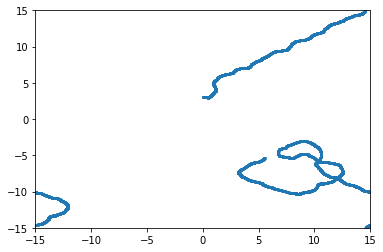

 10%|█         | 1/10 [03:29<31:21, 209.01s/it]

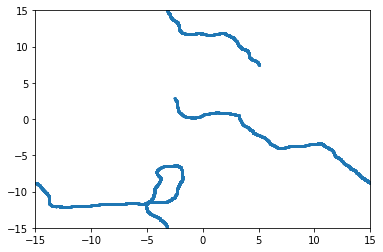

 20%|██        | 2/10 [06:57<27:50, 208.77s/it]

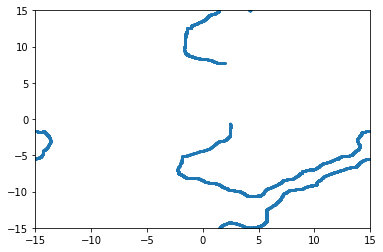

 30%|███       | 3/10 [10:25<24:17, 208.25s/it]

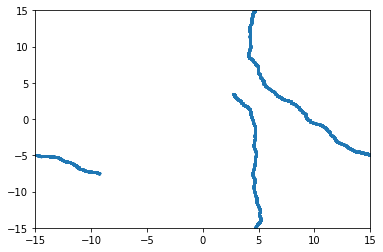

 40%|████      | 4/10 [13:52<20:47, 207.96s/it]

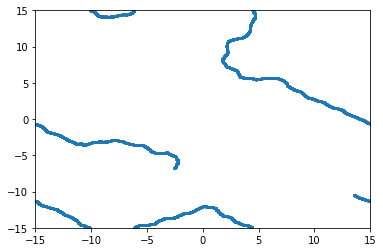

 50%|█████     | 5/10 [17:22<17:22, 208.43s/it]

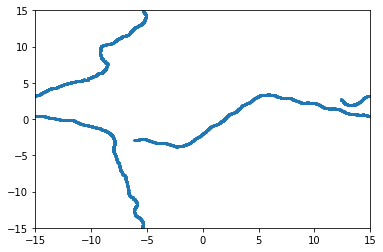

 60%|██████    | 6/10 [20:50<13:53, 208.46s/it]

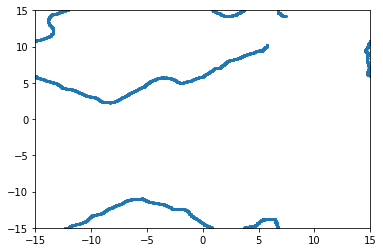

 70%|███████   | 7/10 [24:20<10:27, 209.11s/it]

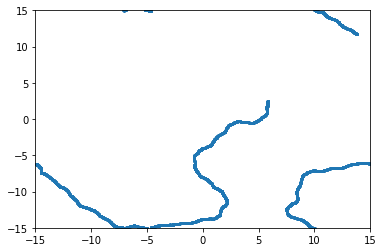

 80%|████████  | 8/10 [27:50<06:58, 209.31s/it]

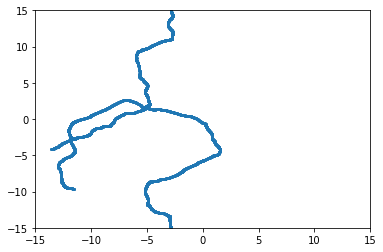

 90%|█████████ | 9/10 [31:18<03:28, 208.93s/it]

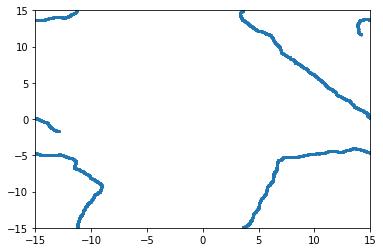

100%|██████████| 10/10 [34:46<00:00, 208.66s/it]


In [14]:
%matplotlib inline


C1 = Cell_Lab(L=30, N_passive = 250,N_active = 1,Fs=5000)

C1.p = 1500
C1.D = 500
C1.Dr = 2
C1.mu = 0.02
C1.mur = 0.8
C1.k = 25
C1.AR = 1.5


N_simul = 30000
name = 'vibrat'
X_traj = []
Y_traj = []
O_traj = []
for _ in trange(10):
    (x_traj,y_traj,o_traj) = C1.measure(N_simul)
    X_traj.append(x_traj)
    Y_traj.append(y_traj)
    O_traj.append(o_traj)

In [15]:
def autocorr(x):
    result = np.correlate(x,x,mode='full')
    z = result[result.size//2:]
    return z/float(z.max())

length = 30000


autox = np.zeros(30000)
autoy = np.zeros(30000)
autosp = np.zeros(30000)
autoang = np.zeros(30000)
dt = C1.dt


ens = len(X_traj)
for j in range(ens):

    o_traj = O_traj[j]
    x_traj = X_traj[j]
    y_traj = Y_traj[j]

    vx = (x_traj[1:]-x_traj[:-1])/dt
    vy = (y_traj[1:]-y_traj[:-1])/dt
    (vx,vy) = C1.periodic(vx,vy)
    angle = np.angle(vx+vy*1j)
    speed = np.sqrt(vx**2+vy**2)


    n = len(autocorr(vx))
    autox[:n] += autocorr(vx)/ens
    autoy[:n] += autocorr(vy)/ens
    autosp[:n] += autocorr(speed)/ens
    autoang[:n] += (autocorr(vx/speed)+autocorr(vy/speed))/(2*ens)



ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


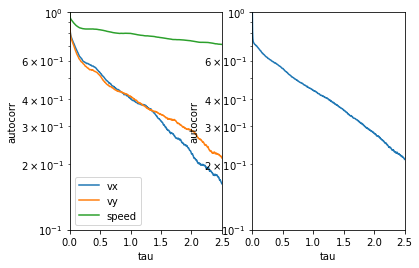

In [17]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
print('ax1 : autocorrelation of vx,vy,|v|')
print('ax2 : autocorrelation of theta')

t_axis = dt*np.arange(30000)
ax1.plot(t_axis,autox,label='vx')
ax1.plot(t_axis,autoy,label='vy')
ax1.plot(t_axis,autosp,label='speed')
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlim(0,5000*dt)
ax1.set_ylim(0.1,1)
ax1.set_xlabel('tau')
ax1.set_ylabel('autocorr')


ax2.plot(t_axis,autoang,label='angle')
ax2.set_yscale('log')
ax2.set_xlim(0,5000*dt)
ax2.set_ylim(0.1,1)
ax2.set_xlabel('tau')
ax2.set_ylabel('autocorr')

plt.show()



In [ ]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
print('ax1 : autocorrelation of vx,vy,|v|')
print('ax2 : autocorrelation of theta')

t_axis = dt*np.arange(30000)
ax1.plot(t_axis,autox,label='vx')
ax1.plot(t_axis,autoy,label='vy')
ax1.plot(t_axis,autosp,label='speed')
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlim(0,5000*dt)
ax1.set_ylim(0.1,1)
ax1.set_xlabel('tau')
ax1.set_ylabel('autocorr')


ax2.plot(t_axis,autoang,label='angle')
ax2.set_yscale('log')
ax2.set_xlim(0,5000*dt)
ax2.set_ylim(0.1,1)
ax2.set_xlabel('tau')
ax2.set_ylabel('autocorr')

plt.show()



ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


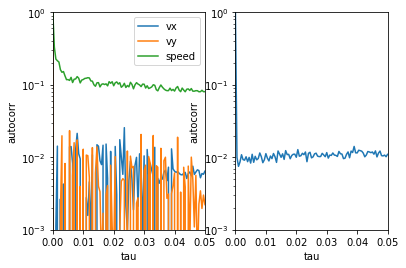

In [12]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
print('ax1 : autocorrelation of vx,vy,|v|')
print('ax2 : autocorrelation of theta')

t_axis = dt*np.arange(30000)
ax1.plot(t_axis,autox,label='vx')
ax1.plot(t_axis,autoy,label='vy')
ax1.plot(t_axis,autosp,label='speed')
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlim(0,100*dt)
ax1.set_ylim(0.001,1)
ax1.set_xlabel('tau')
ax1.set_ylabel('autocorr')


ax2.plot(t_axis,autoang,label='angle')
ax2.set_yscale('log')
ax2.set_xlim(0,100*dt)
ax2.set_ylim(0.001,1)
ax2.set_xlabel('tau')
ax2.set_ylabel('autocorr')

plt.show()




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange
import os
import imageio
from PIL import Image
from Cell_Lab import Cell_Lab

model initialized


<IPython.core.display.Javascript object>


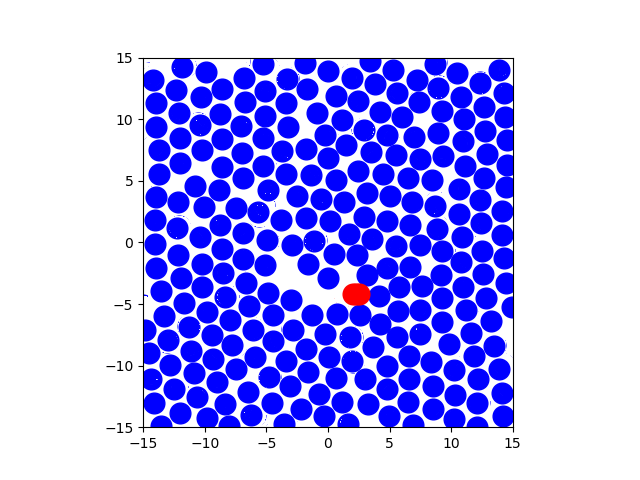

100%|██████████| 3000/3000 [06:25<00:00,  7.78it/s]


In [3]:
%matplotlib notebook

C1 = Cell_Lab(L=30, N_passive = 250,N_active = 1,Fs=5000)

C1.p = 2500
C1.D = 500
C1.Dr = 2
C1.mu = 0.02
C1.mur = 0.08
C1.k = 25
C1.AR = 1.5

C1.N_skip =10

N_simul = 3000
name = 'vibrat'
C1.animate(N_simul,name)




In [4]:

path_dir = os.getcwd()+'/record/'+name+'/'
t_list = np.arange(N_simul)
# t_list = np.arange(500)
path=[path_dir+f"{t}.png" for t in t_list]
paths=[Image.open(i) for i in path]
imageio.mimsave(path_dir+name+'.gif',paths,fps=30)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange
import os
import imageio
from PIL import Image
%matplotlib inline

file = pd.ExcelFile('vibrated_particle_traj.xlsx')

settings= file.sheet_names

print(settings)  # sheet names 'degree, AR'

['10도 AR1', '10도 AR1.25', '10도 AR1.5', '10도 AR2', '10도 AR2.5', '4도 AR1.25', '4도 AR1.5', '4도 AR2', '4도 AR2.5']


<IPython.core.display.Javascript object>


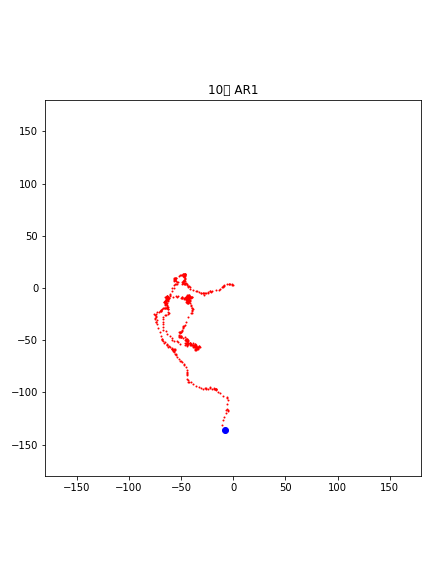

100%|██████████| 531/531 [00:35<00:00, 15.01it/s]


<IPython.core.display.Javascript object>


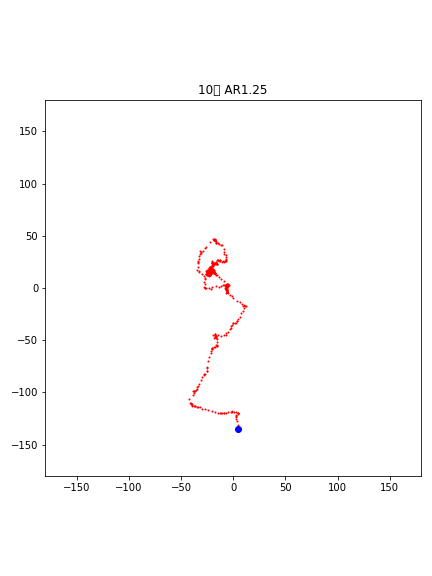

100%|██████████| 471/471 [00:31<00:00, 14.74it/s]


<IPython.core.display.Javascript object>


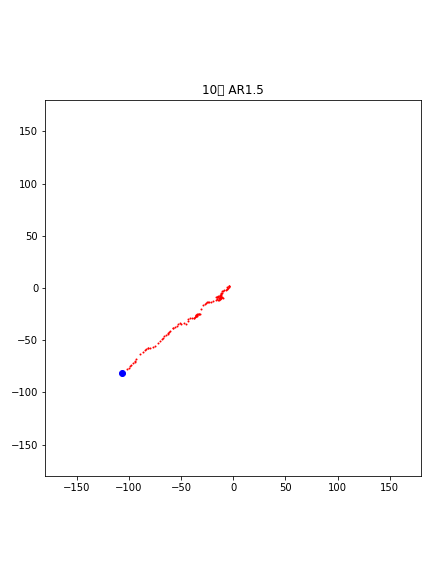

100%|██████████| 108/108 [00:06<00:00, 15.58it/s]


<IPython.core.display.Javascript object>


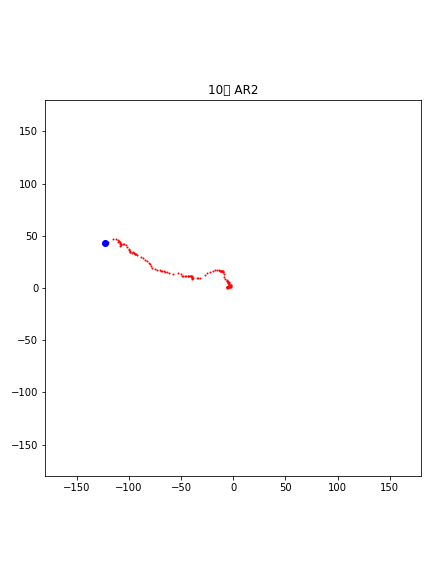

100%|██████████| 117/117 [00:07<00:00, 15.76it/s]


<IPython.core.display.Javascript object>


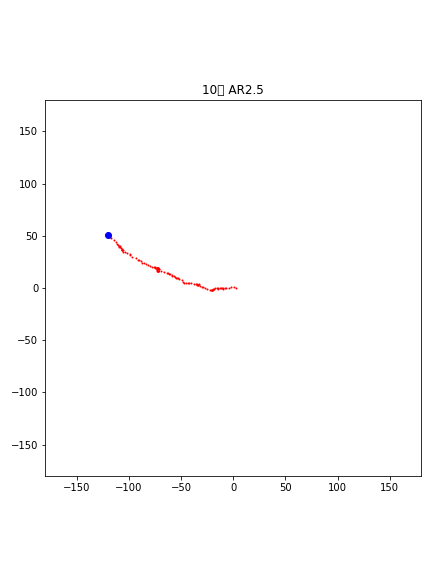

100%|██████████| 114/114 [00:07<00:00, 15.33it/s]


<IPython.core.display.Javascript object>


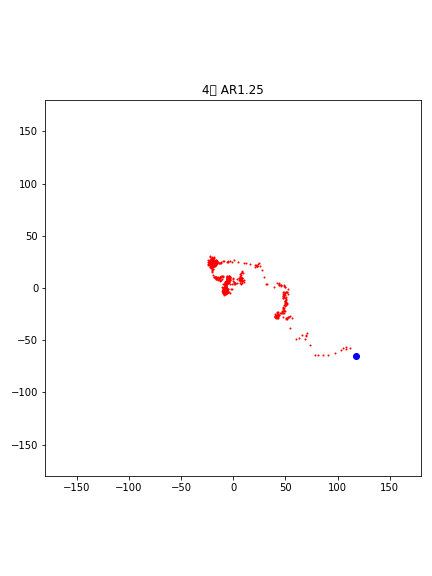

100%|██████████| 626/626 [00:39<00:00, 15.70it/s]


<IPython.core.display.Javascript object>


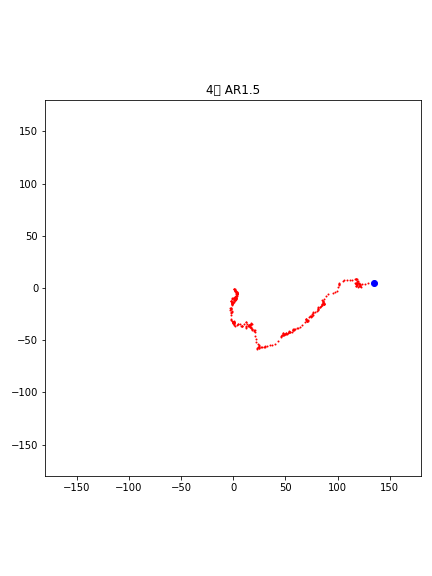

100%|██████████| 309/309 [00:19<00:00, 15.65it/s]


<IPython.core.display.Javascript object>


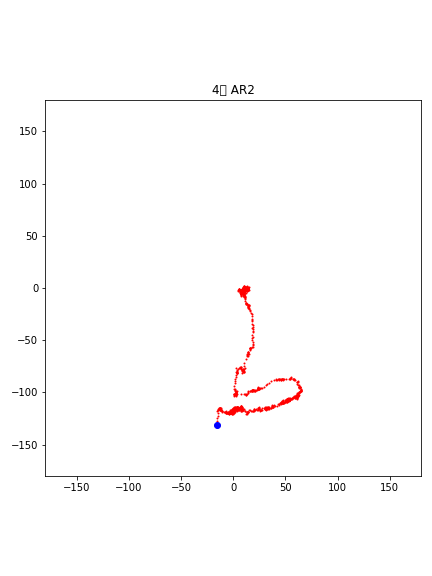

100%|██████████| 1193/1193 [01:16<00:00, 15.55it/s]


<IPython.core.display.Javascript object>


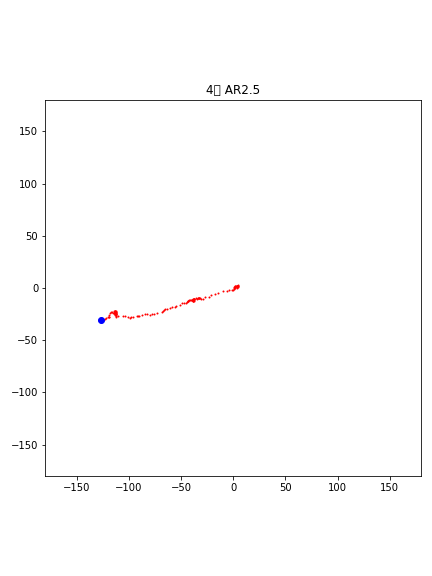

100%|██████████| 131/131 [00:08<00:00, 15.69it/s]


In [15]:
%matplotlib notebook
for setting in settings:
    df = pd.read_excel(file,setting)
    t_list = []
    x_list = []
    y_list = []
    for i in df.columns:
        if i[0]=='t':
            t_list.append(i)
        elif i[0]=='x':
            x_list.append(i)
        elif i[0]=='y':
            y_list.append(i)
            
#     for j in range(len(t_list)):   # trajectories
#         plt.title(setting)
#         plt.xlabel(x_list[j])
#         plt.ylabel(y_list[j])
#         plt.scatter(df[x_list[j]],df[y_list[j]])
#         plt.show()
        
    fig1 = plt.figure(figsize=(6,8))
    ax1 = fig1.add_subplot(111)
    L=180
    axrange = [-L, L, -L, L]

    ax1.axis(axrange)
    ax1.set_aspect('equal','box')

    

    fig1.show()
    fig1.tight_layout()
    fig1.canvas.draw()

    

    os.makedirs('record/'+setting,exist_ok=True)
    for j in range(len(t_list)):
        
        n = int(np.sum(np.ones(len(df[x_list[j]]))*(~np.isnan(df[x_list[j]]))))
        for nn in trange(n):
            os.makedirs('record/'+setting+'/'+str(j),exist_ok=True)

            ax1.clear()
            ax1.scatter(df[x_list[j]][:nn],df[y_list[j]][:nn],s = 1,color='red')
            ax1.scatter(df[x_list[j]][nn],df[y_list[j]][nn],color='blue')

            ax1.axis(axrange)
            ax1.set_aspect('equal', 'box')




            ax1.set_title(setting)

            fig1.canvas.draw()
            fig1.savefig(str(os.getcwd())+'/record/'+setting+'/'+str(j)+'/'+str(nn)+'.png')
        path_dir = os.getcwd()+'/record/'
        
        time_list = np.arange(n)
        path=[path_dir+setting+'/'+str(j)+f"/{t}.png" for t in time_list]
        paths=[Image.open(i) for i in path]
        imageio.mimsave(path_dir+setting+'_'+str(j)+'.gif',paths,fps=30)


10도 AR1
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


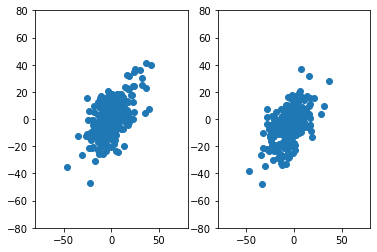

10도 AR1
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


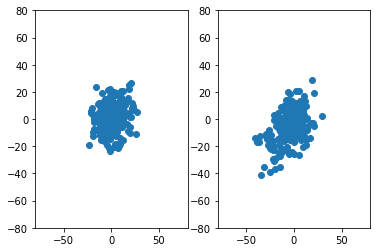

10도 AR1
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


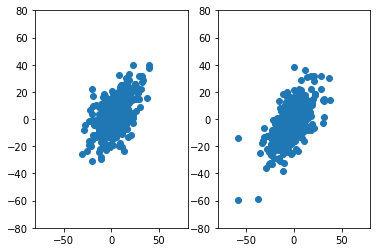

10도 AR1
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


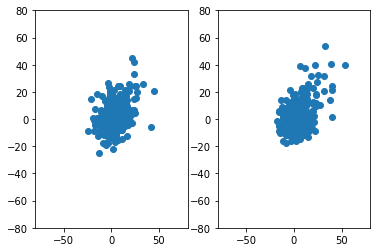

10도 AR1
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


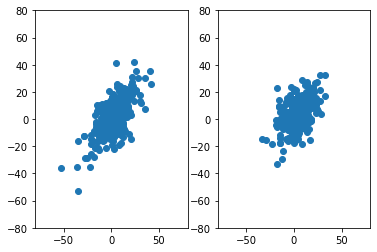

10도 AR1
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


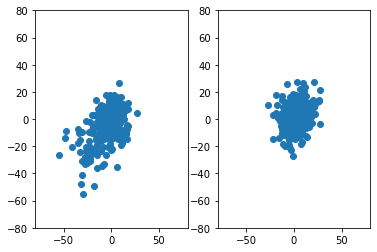

10도 AR1
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


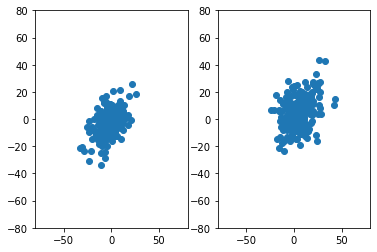

10도 AR1
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


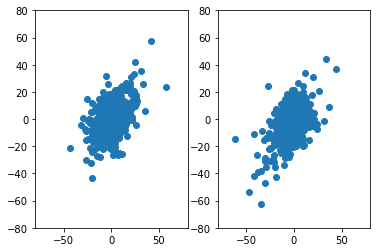

10도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


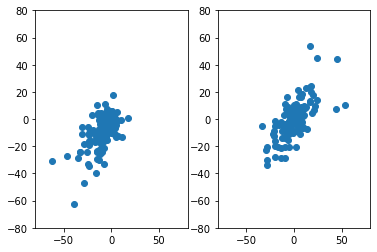

10도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


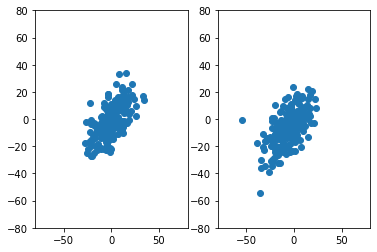

10도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


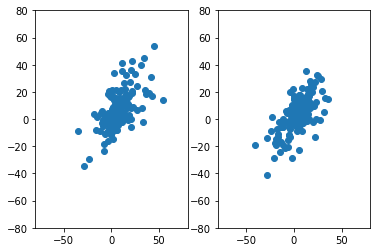

10도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


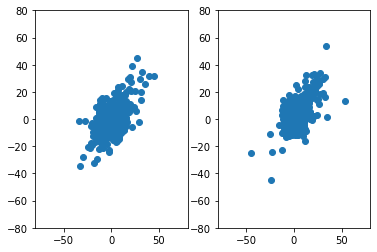

10도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


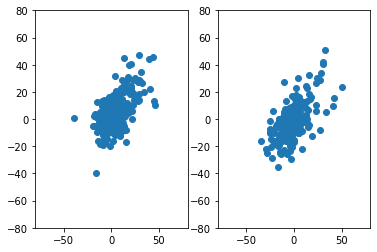

10도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


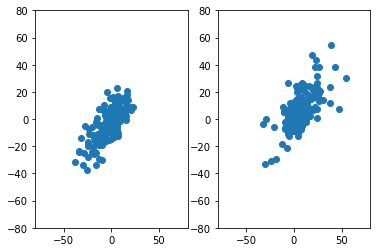

10도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


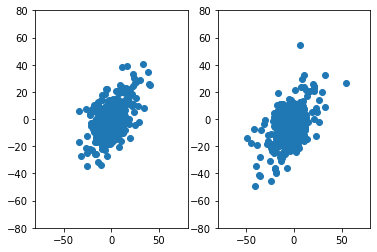

10도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


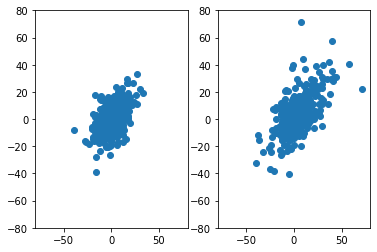

10도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


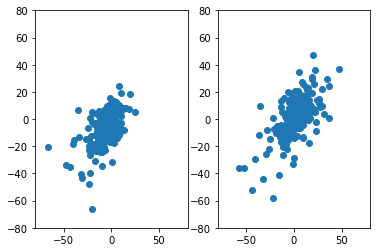

10도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


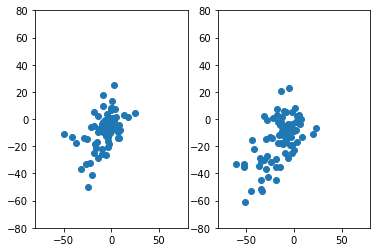

10도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


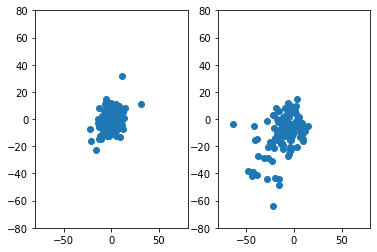

10도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


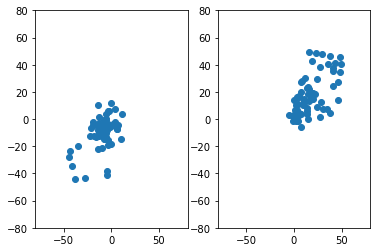

10도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


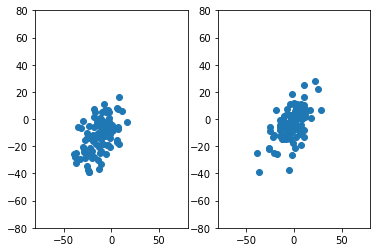

10도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


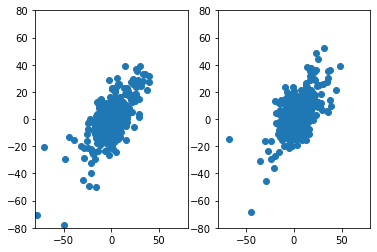

10도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


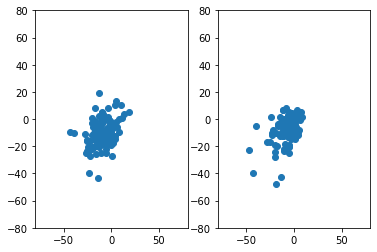

10도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


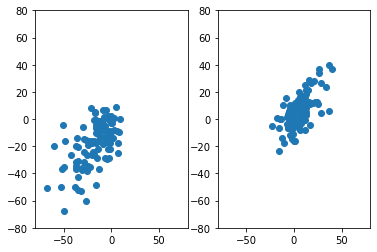

10도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


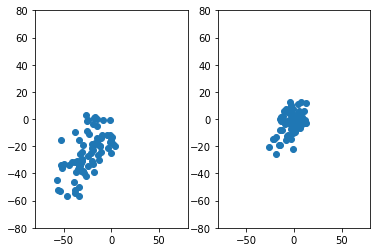

10도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


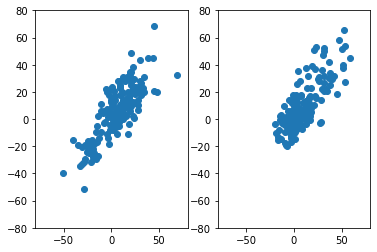

10도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


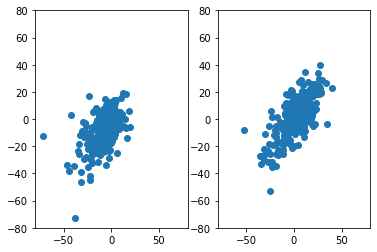

10도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


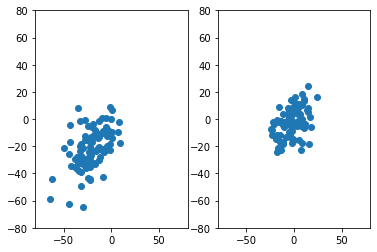

10도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


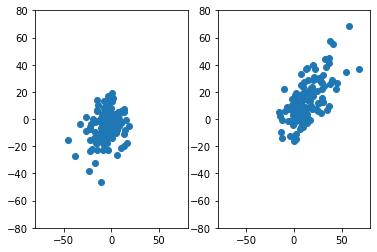

10도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


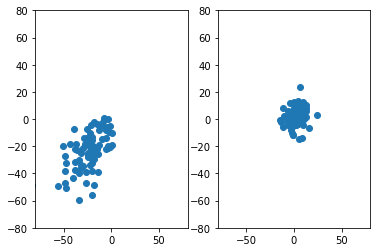

10도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


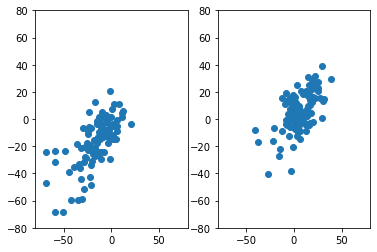

10도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


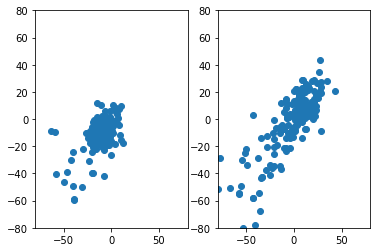

10도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


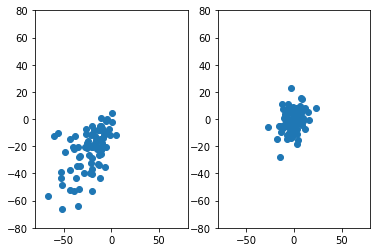

10도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


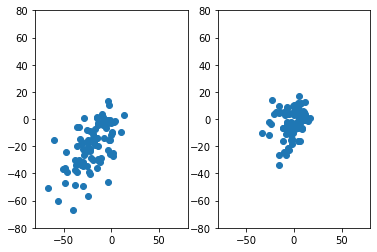

10도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


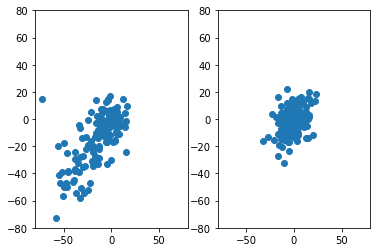

10도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


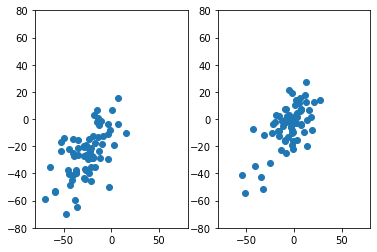

10도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


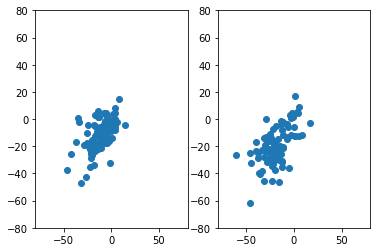

10도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


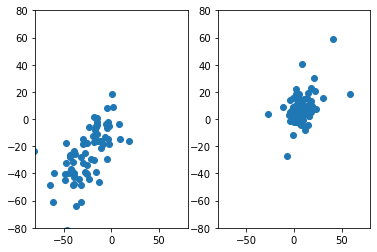

10도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


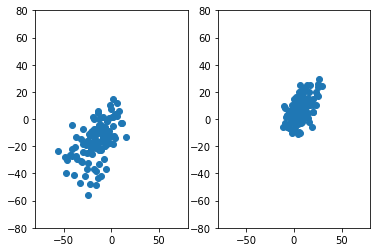

4도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


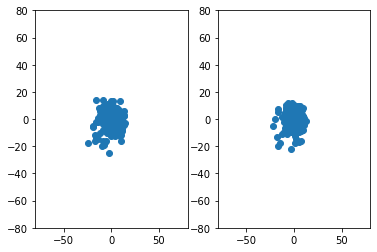

4도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


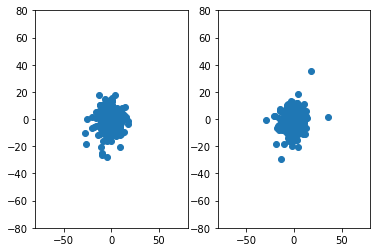

4도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


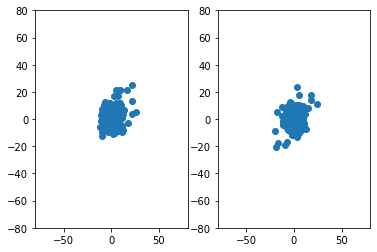

4도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


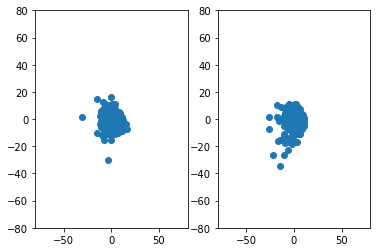

4도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


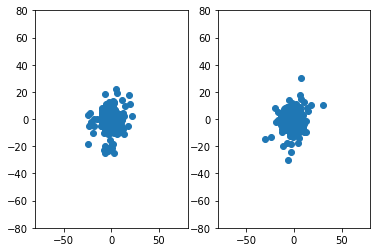

4도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


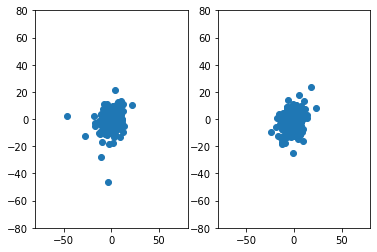

4도 AR1.25
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


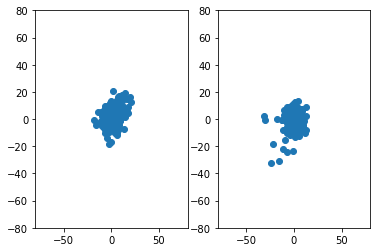

4도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


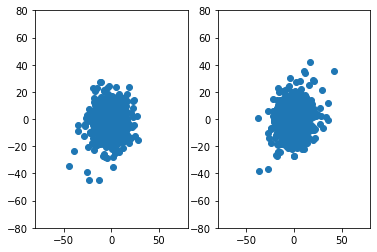

4도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


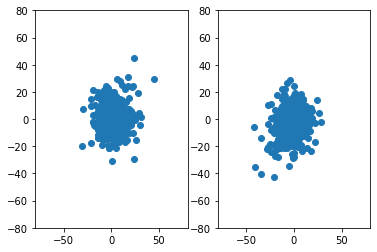

4도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


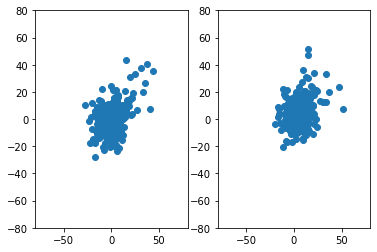

4도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


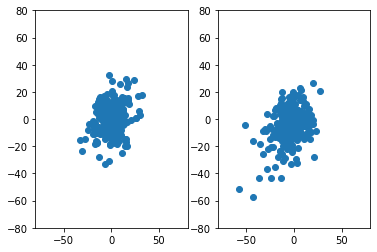

4도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


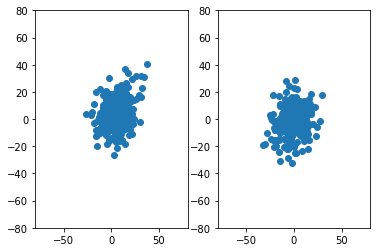

4도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


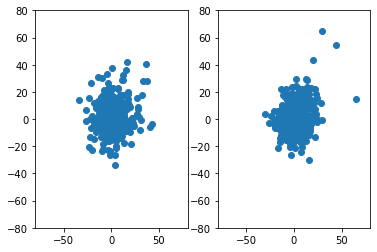

4도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


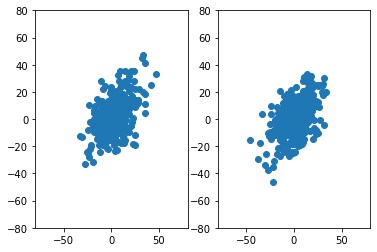

4도 AR1.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


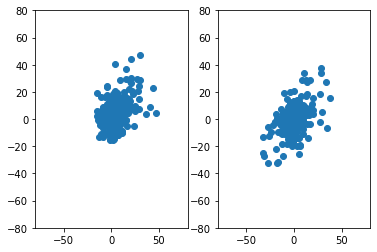

4도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


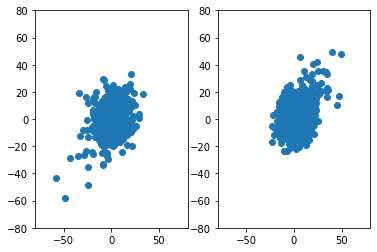

4도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


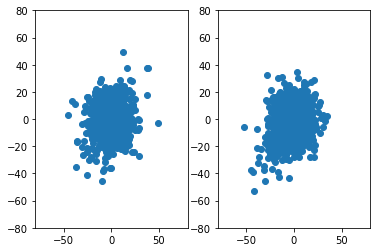

4도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


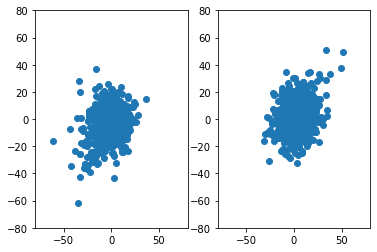

4도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


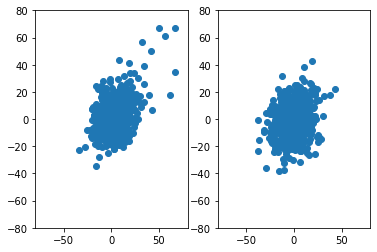

4도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


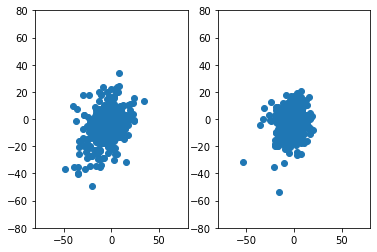

4도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


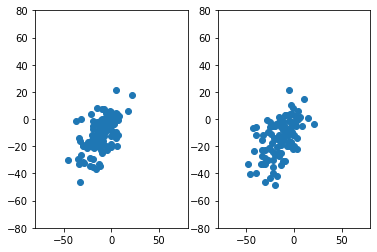

4도 AR2
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


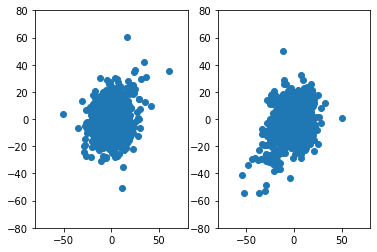

4도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


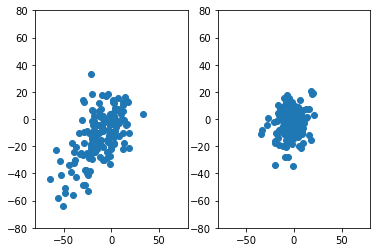

4도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


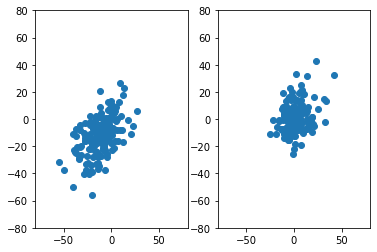

4도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


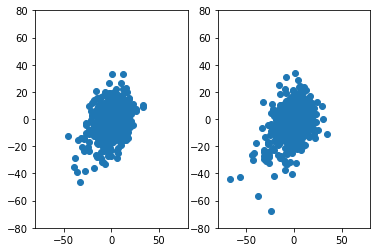

4도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


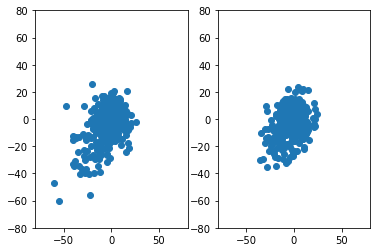

4도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


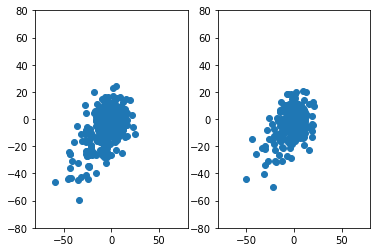

4도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


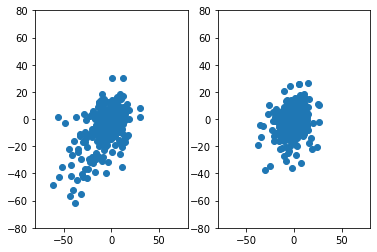

4도 AR2.5
ax1 : vx(t),vx(t+dt)
ax2 : vy(t),vy(t+dt)


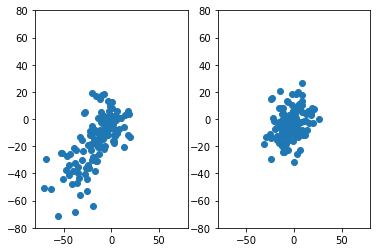

In [4]:
for setting in settings:
    df = pd.read_excel(file,setting)
    t_list = []
    x_list = []
    y_list = []
    for i in df.columns:
        if i[0]=='t':
            t_list.append(i)
        elif i[0]=='x':
            x_list.append(i)
        elif i[0]=='y':
            y_list.append(i)
            
#     for j in range(len(t_list)):   # trajectories
#         plt.title(setting)
#         plt.xlabel(x_list[j])
#         plt.ylabel(y_list[j])
#         plt.scatter(df[x_list[j]],df[y_list[j]])
#         plt.show()
    
    for j in range(len(t_list)):
        print(setting)

        t_traj = df[t_list[j]].to_numpy()
        x_traj = df[x_list[j]].to_numpy()
        y_traj = df[y_list[j]].to_numpy()
        
        dt = t_traj[1:]-t_traj[:-1]
        vx = (x_traj[1:]-x_traj[:-1])/dt
        vy = (y_traj[1:]-y_traj[:-1])/dt

        fig1 = plt.figure()
        ax1 = fig1.add_subplot(121)
        ax2 = fig1.add_subplot(122)
        
        axrange = [-80,80,-80,80]

        print('ax1 : vx(t),vx(t+dt)')
        print('ax2 : vy(t),vy(t+dt)')
        ax1.scatter(vx[:-1],vx[1:])
        ax1.axis(axrange)
        
        ax2.scatter(vy[:-1],vy[1:])
        ax2.axis(axrange)
        
        plt.show()
    # print(t_list,x_list,y_list)

10도 AR1
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


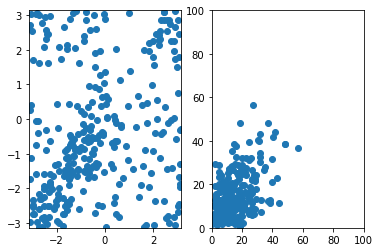

10도 AR1
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


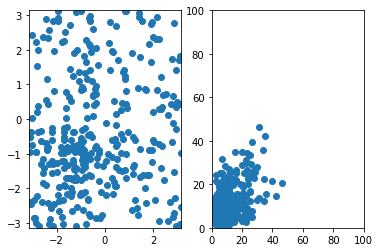

10도 AR1
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


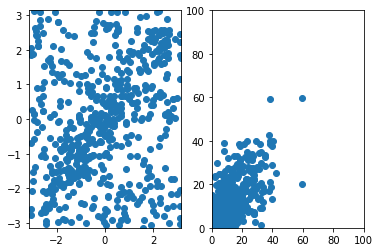

10도 AR1
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


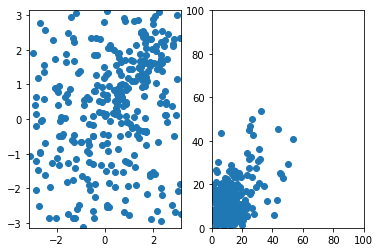

10도 AR1
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


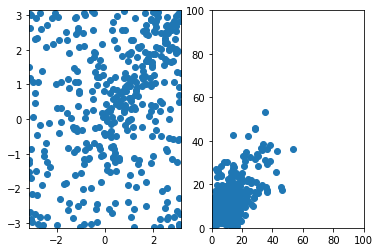

10도 AR1
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


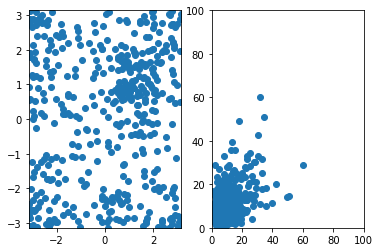

10도 AR1
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


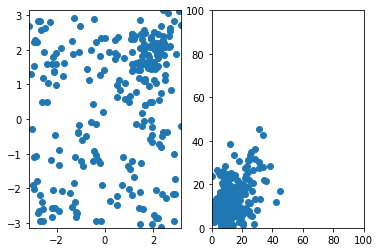

10도 AR1
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


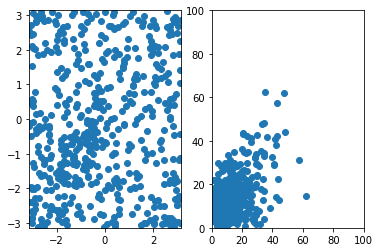

10도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


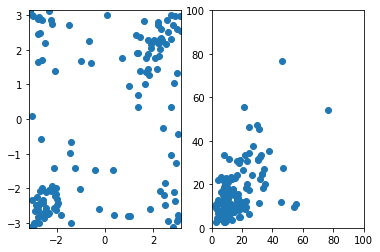

10도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


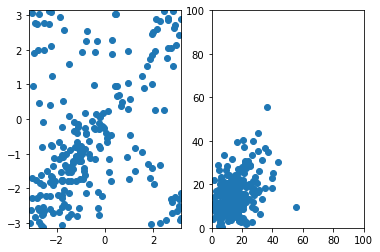

10도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


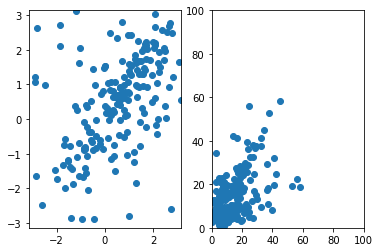

10도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


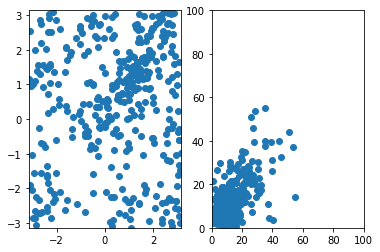

10도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


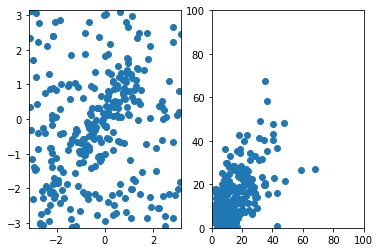

10도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


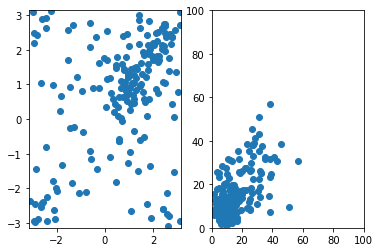

10도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


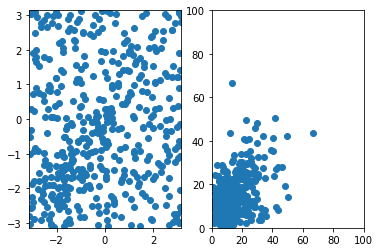

10도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


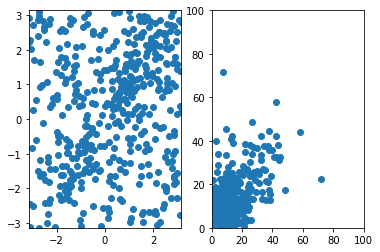

10도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


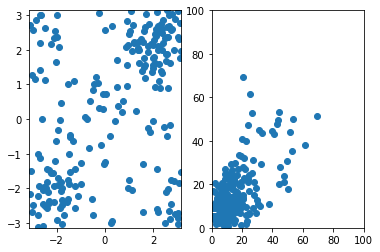

10도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


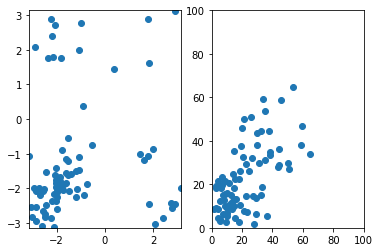

10도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


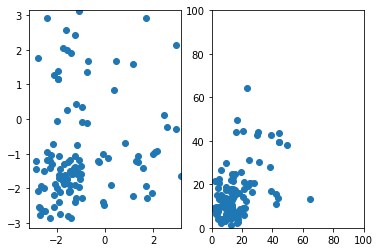

10도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


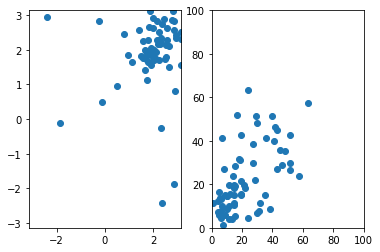

10도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


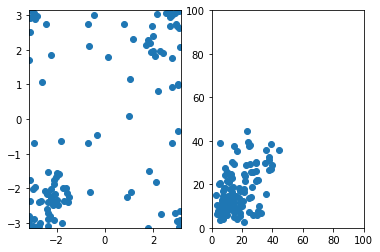

10도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


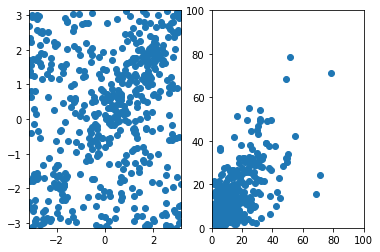

10도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


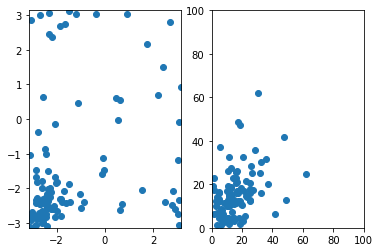

10도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


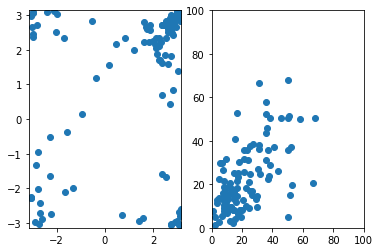

10도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


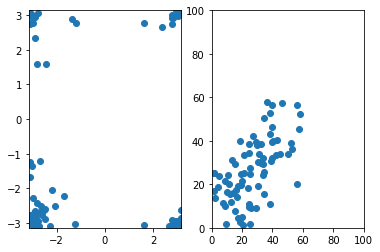

10도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


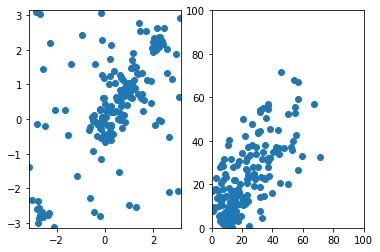

10도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


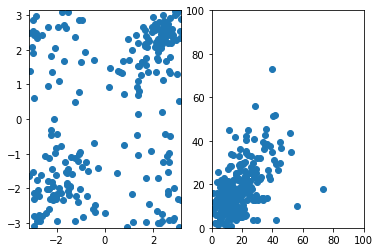

10도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


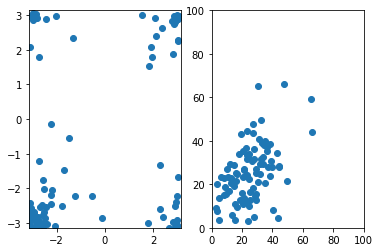

10도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


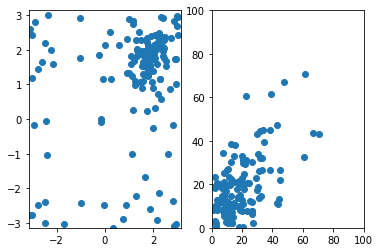

10도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


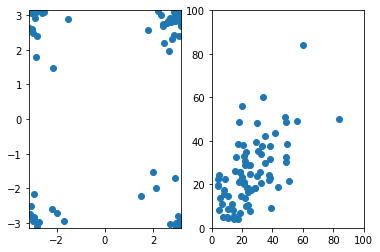

10도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


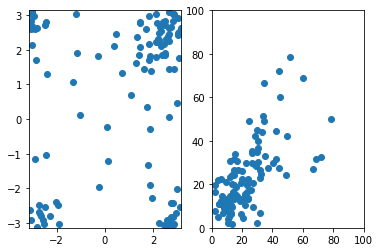

10도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


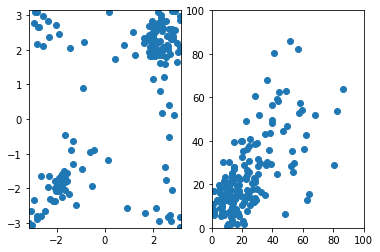

10도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


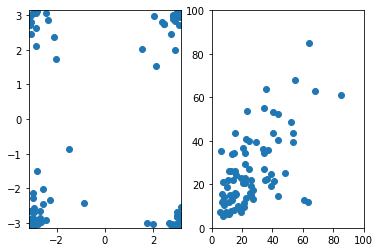

10도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


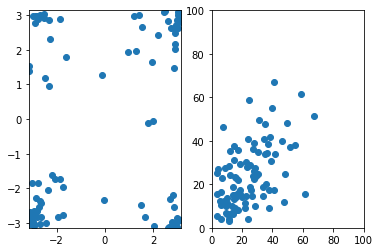

10도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


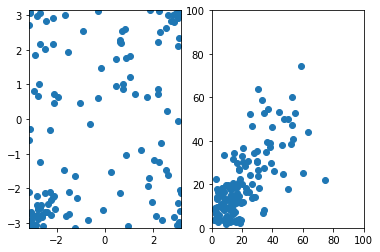

10도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


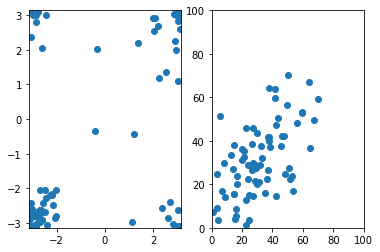

10도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


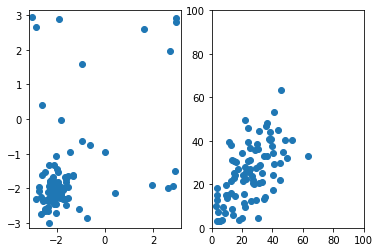

10도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


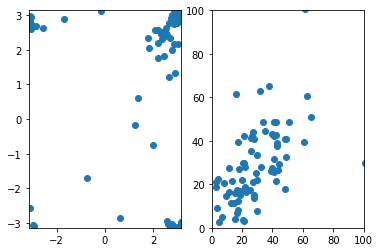

10도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


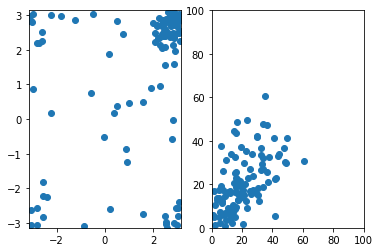

4도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


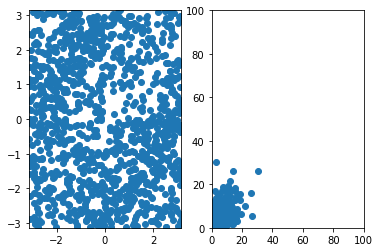

4도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


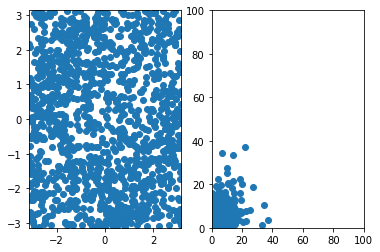

4도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


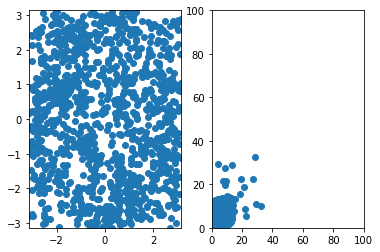

4도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


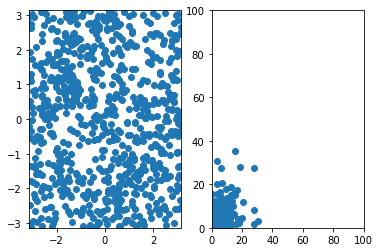

4도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


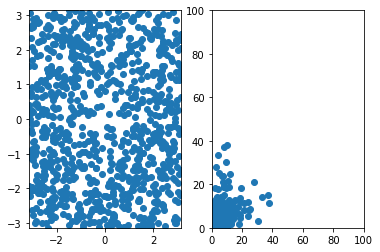

4도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


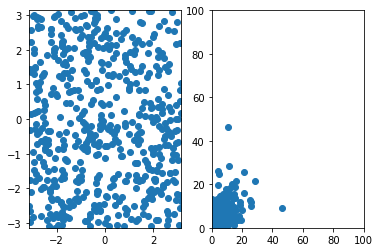

4도 AR1.25
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


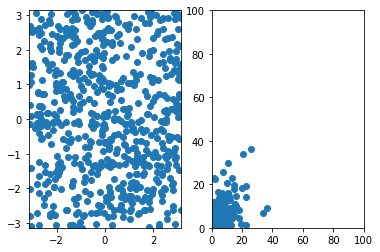

4도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


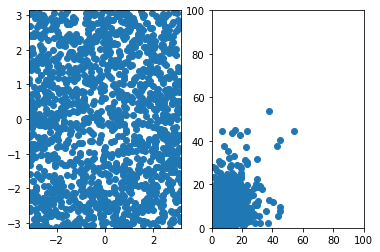

4도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


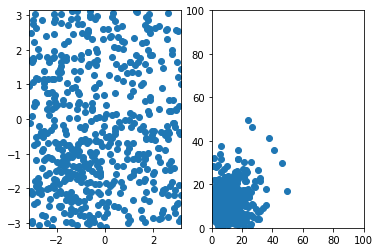

4도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


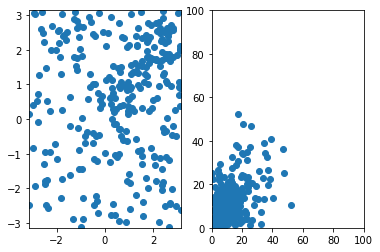

4도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


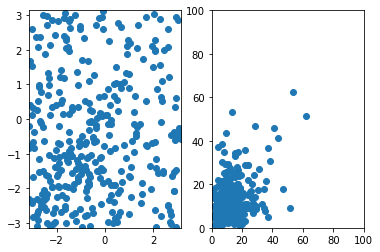

4도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


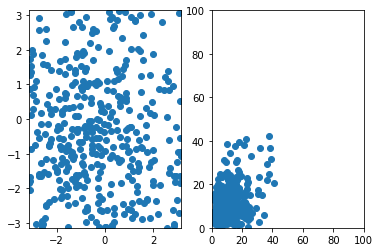

4도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


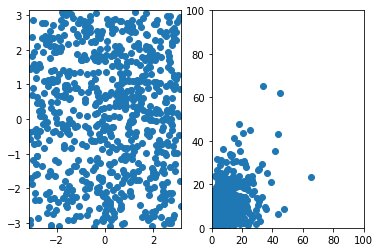

4도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


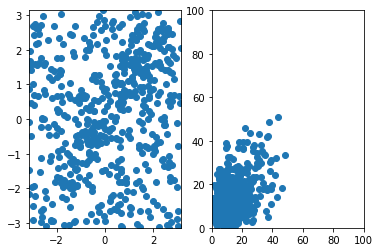

4도 AR1.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


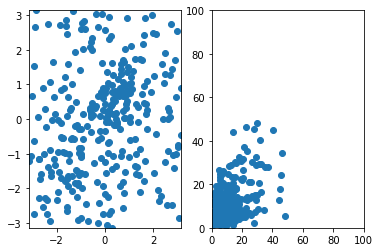

4도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


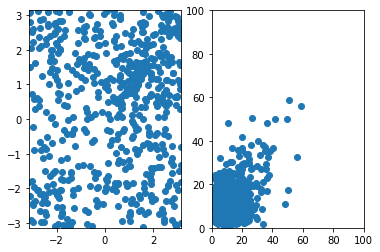

4도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


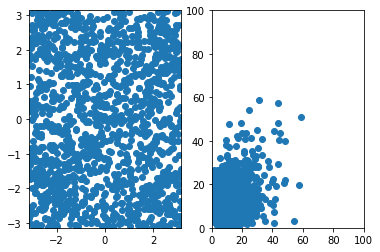

4도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


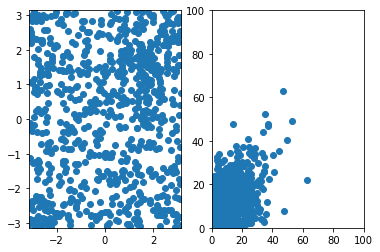

4도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


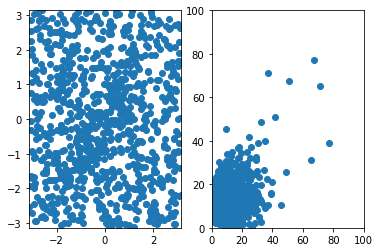

4도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


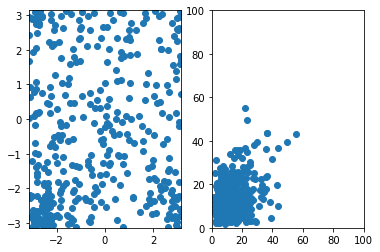

4도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


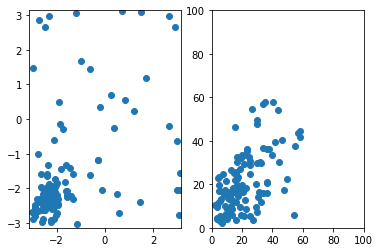

4도 AR2
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


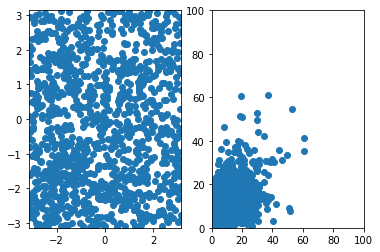

4도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


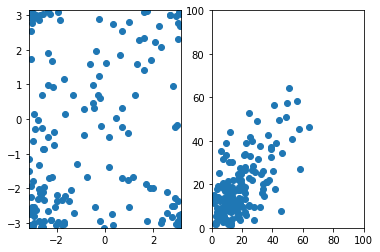

4도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


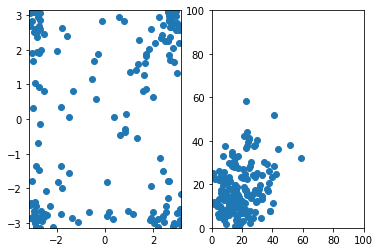

4도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


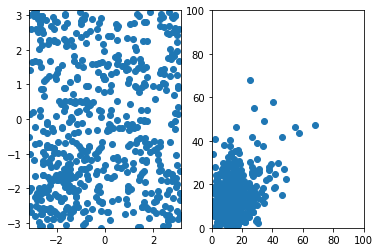

4도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


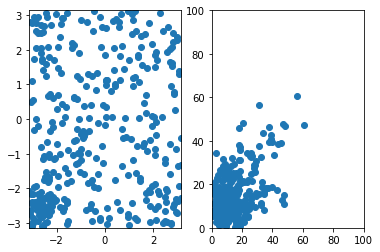

4도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


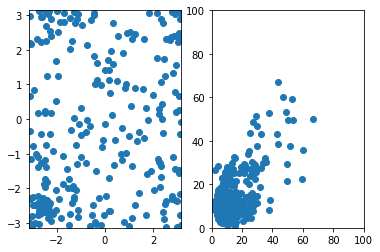

4도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


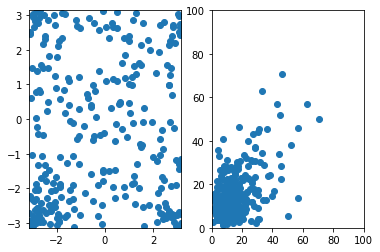

4도 AR2.5
ax1 : angle(t),angle(t+dt)
ax2 : speed(t),speed(t+dt)


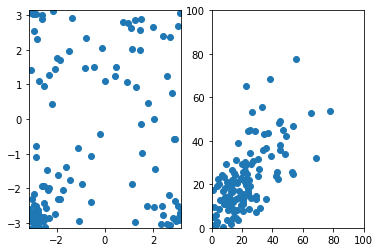

In [5]:
for setting in settings:
    df = pd.read_excel(file,setting)
    t_list = []
    x_list = []
    y_list = []
    for i in df.columns:
        if i[0]=='t':
            t_list.append(i)
        elif i[0]=='x':
            x_list.append(i)
        elif i[0]=='y':
            y_list.append(i)
            
#     for j in range(len(t_list)):   # trajectories
#         plt.title(setting)
#         plt.xlabel(x_list[j])
#         plt.ylabel(y_list[j])
#         plt.scatter(df[x_list[j]],df[y_list[j]])
#         plt.show()
    
    for j in range(len(t_list)):
        print(setting)

        t_traj = df[t_list[j]].to_numpy()
        x_traj = df[x_list[j]].to_numpy()
        y_traj = df[y_list[j]].to_numpy()
        
        dt = t_traj[1:]-t_traj[:-1]
        vx = (x_traj[1:]-x_traj[:-1])/dt
        vy = (y_traj[1:]-y_traj[:-1])/dt
        angle = np.angle(vx+vy*1j)
        speed = np.sqrt(vx**2+vy**2)

        fig1 = plt.figure()
        ax1 = fig1.add_subplot(121)
        ax2 = fig1.add_subplot(122)
        
        angrange = [-np.pi,np.pi,-np.pi,np.pi]
        speedrange = [0,100,0,100]

        print('ax1 : angle(t),angle(t+dt)')
        print('ax2 : speed(t),speed(t+dt)')
        ax1.scatter(angle[:-1],angle[1:])
        ax1.axis(angrange)
        
        ax2.scatter(speed[:-1],speed[1:])
        ax2.axis(speedrange)
        
        plt.show()
    # print(t_list,x_list,y_list)

10도 AR1
ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


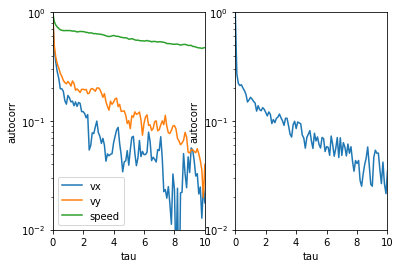

10도 AR1.25
ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


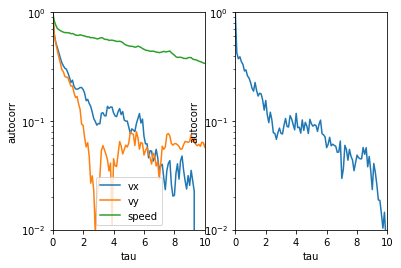

10도 AR1.5
ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


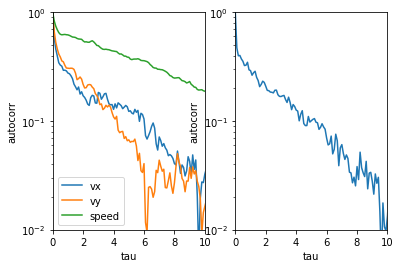

10도 AR2
ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


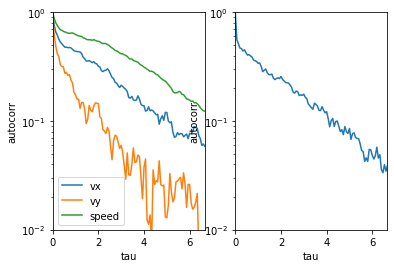

10도 AR2.5
ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


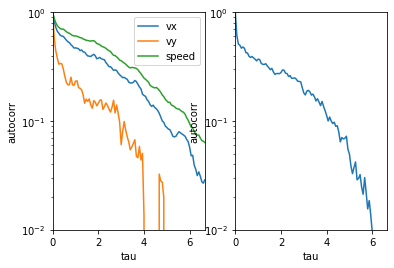

4도 AR1.25
ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


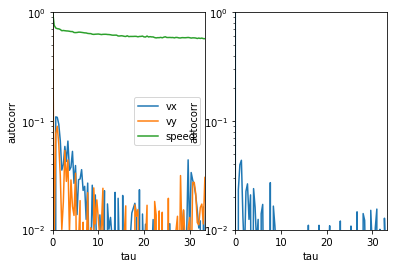

4도 AR1.5
ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


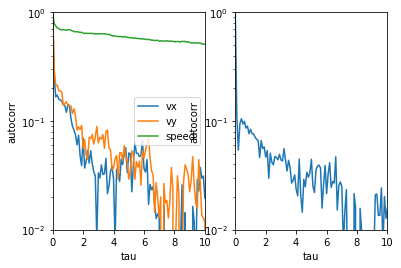

4도 AR2
ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


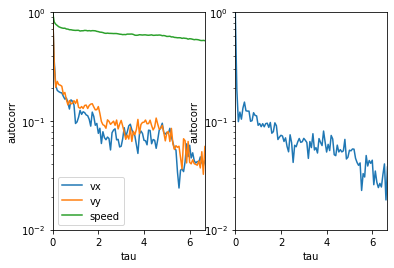

4도 AR2.5
ax1 : autocorrelation of vx,vy,|v|
ax2 : autocorrelation of theta


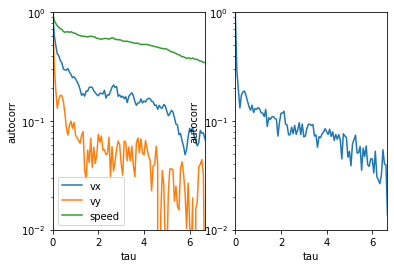

In [40]:
# autocorrelation

def autocorr(x):
    result = np.correlate(x,x,mode='full')
    z = result[result.size//2:]
    return z/float(z.max())

for setting in settings:
    df = pd.read_excel(file,setting)
    t_list = []
    x_list = []
    y_list = []
    for i in df.columns:
        if i[0]=='t':
            t_list.append(i)
        elif i[0]=='x':
            x_list.append(i)
        elif i[0]=='y':
            y_list.append(i)
            
#     for j in range(len(t_list)):   # trajectories
#         plt.title(setting)
#         plt.xlabel(x_list[j])
#         plt.ylabel(y_list[j])
#         plt.scatter(df[x_list[j]],df[y_list[j]])
#         plt.show()
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(121)
    ax2 = fig1.add_subplot(122)
    autox = np.zeros(1500)
    autoy = np.zeros(1500)
    autosp = np.zeros(1500)
    autoang = np.zeros(1500)
    print(setting)
    

    for j in range(len(t_list)):
        
        n = int(np.sum(np.ones(len(df[x_list[j]]))*(~np.isnan(df[x_list[j]]))))

        t_traj = df[t_list[j]].to_numpy()[:n]
        x_traj = df[x_list[j]].to_numpy()[:n]
        y_traj = df[y_list[j]].to_numpy()[:n]
        
        dt = t_traj[1:]-t_traj[:-1]
        vx = (x_traj[1:]-x_traj[:-1])/dt
        vy = (y_traj[1:]-y_traj[:-1])/dt
        angle = np.angle(vx+vy*1j)
        speed = np.sqrt(vx**2+vy**2)
        
        
        autox[:n-1] += autocorr(vx)/len(t_list)
        autoy[:n-1] += autocorr(vy)/len(t_list)
        autosp[:n-1] += autocorr(speed)/len(t_list)
#         autoang[:n-1] += autocorr(angle)/len(t_list)
        autoang[:n-1] += (autocorr(vx/speed)+autocorr(vy/speed))/(2*len(t_list))
        

        
        
#         angrange = [-np.pi,np.pi,-np.pi,np.pi]
#         speedrange = [0,100,0,100]

    print('ax1 : autocorrelation of vx,vy,|v|')
    print('ax2 : autocorrelation of theta')
    
    t_axis = dt[1]*np.arange(1500)
    ax1.plot(t_axis,autox,label='vx')
    ax1.plot(t_axis,autoy,label='vy')
    ax1.plot(t_axis,autosp,label='speed')
    ax1.legend()
#         ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlim(0,100*dt[1])
    ax1.set_ylim(0.01,1)
    ax1.set_xlabel('tau')
    ax1.set_ylabel('autocorr')


    ax2.plot(t_axis,autoang,label='angle')
    ax2.set_yscale('log')
    ax2.set_xlim(0,100*dt[1])
    ax2.set_ylim(0.01,1)
    ax2.set_xlabel('tau')
    ax2.set_ylabel('autocorr')






    plt.show()
    # print(t_list,x_list,y_list)

10도 AR1
ax1 : speed hist


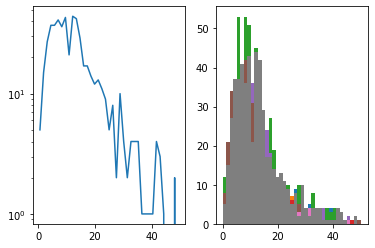

10도 AR1.25
ax1 : speed hist


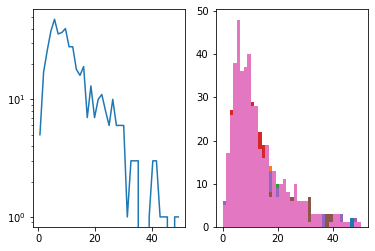

10도 AR1.5
ax1 : speed hist


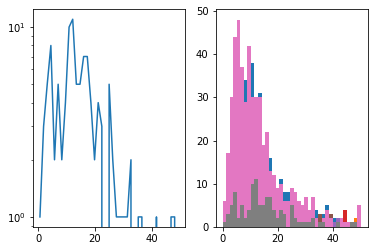

10도 AR2
ax1 : speed hist


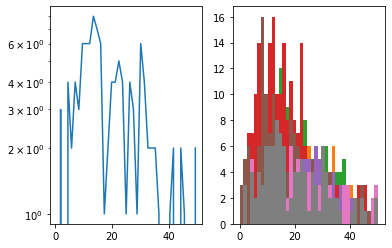

10도 AR2.5
ax1 : speed hist


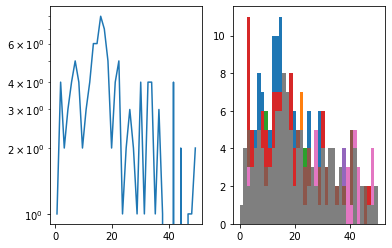

4도 AR1.25
ax1 : speed hist


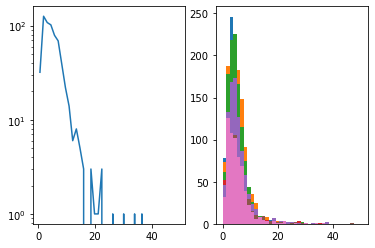

4도 AR1.5
ax1 : speed hist


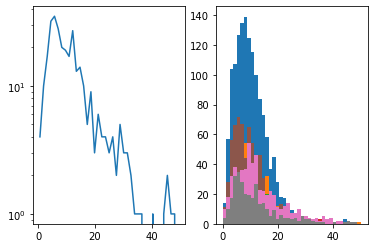

4도 AR2
ax1 : speed hist


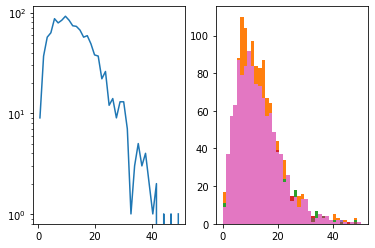

4도 AR2.5
ax1 : speed hist


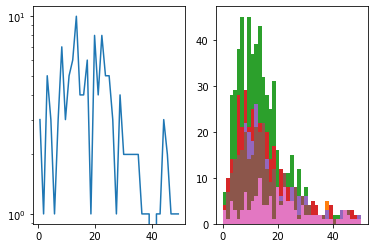

In [8]:
for setting in settings:
    df = pd.read_excel(file,setting)
    t_list = []
    x_list = []
    y_list = []
    for i in df.columns:
        if i[0]=='t':
            t_list.append(i)
        elif i[0]=='x':
            x_list.append(i)
        elif i[0]=='y':
            y_list.append(i)
           
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(121)
    ax2 = fig1.add_subplot(122)
    print(setting)
    
    print('ax1 : speed hist')
#     print('ax2 : dangle hist')
    
    speed_bins = np.linspace(0,50,40)
    speed_cum = np.zeros(39)
    angle_bins = np.linspace(-np.pi,np.pi,100)
    angle_cum = np.zeros(99)
    
    for j in range(len(t_list)):
        

        t_traj = df[t_list[j]].to_numpy()
        x_traj = df[x_list[j]].to_numpy()
        y_traj = df[y_list[j]].to_numpy()
        
        dt = t_traj[1:]-t_traj[:-1]
        vx = (x_traj[1:]-x_traj[:-1])/dt
        vy = (y_traj[1:]-y_traj[:-1])/dt
#         angle = np.angle(vx+vy*1j)
        speed = np.sqrt(vx**2+vy**2)
#         dangle = angle[1:]-angle[:-1]

       
        n=70
        speed_count,_,_ = plt.hist(speed, speed_bins)
        speed_cum+=speed_count
        
#         angle_count,_,_ = plt.hist(vy,speed_bins)
#         angle_cum+=angle_count
    
    
    ax1.plot((speed_bins[:-1]+speed_bins[1:])/2,speed_count)
    ax1.set_yscale('log')
#     ax2.plot((angle_bins[:1]+angle_bins[1:])/2, angle_count)
#     ax2.set_yscale('log')



    plt.show()
    # print(t_list,x_list,y_list)

10도 AR1
ax1 : path length
ax2 : velocity


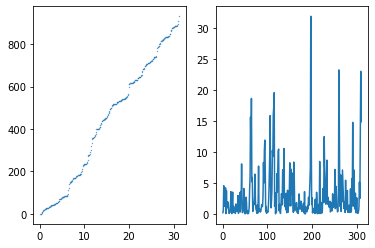

10도 AR1
ax1 : path length
ax2 : velocity


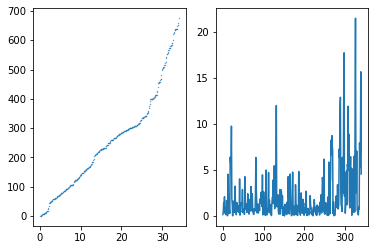

10도 AR1
ax1 : path length
ax2 : velocity


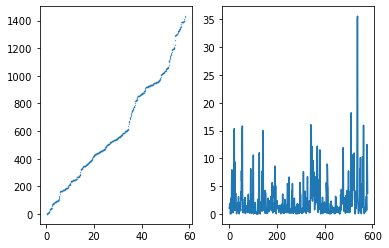

10도 AR1
ax1 : path length
ax2 : velocity


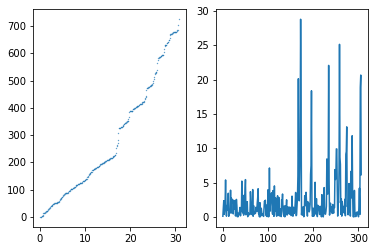

10도 AR1
ax1 : path length
ax2 : velocity


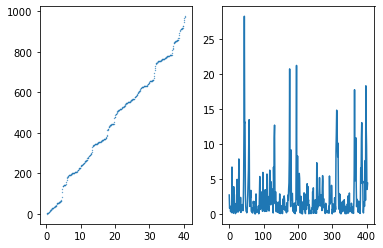

10도 AR1
ax1 : path length
ax2 : velocity


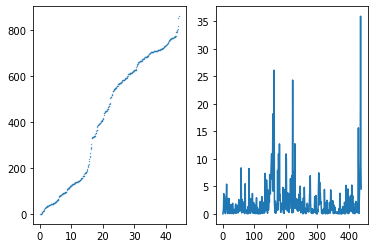

10도 AR1
ax1 : path length
ax2 : velocity


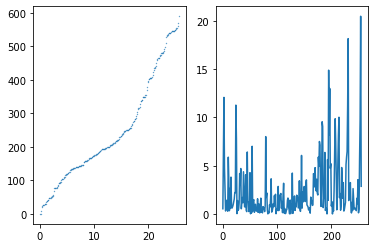

10도 AR1
ax1 : path length
ax2 : velocity


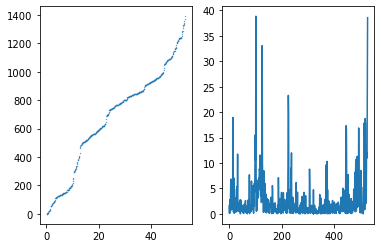

10도 AR1.25
ax1 : path length
ax2 : velocity


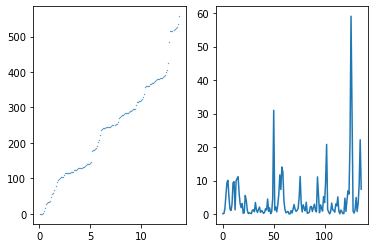

10도 AR1.25
ax1 : path length
ax2 : velocity


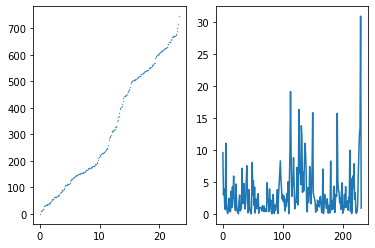

10도 AR1.25
ax1 : path length
ax2 : velocity


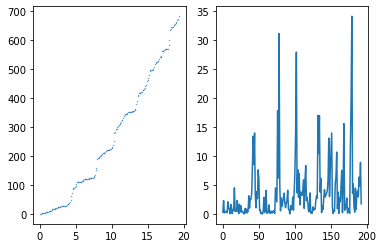

10도 AR1.25
ax1 : path length
ax2 : velocity


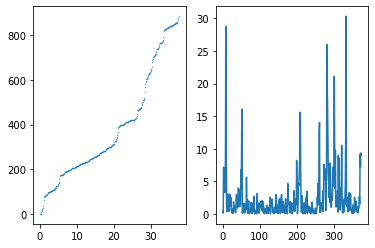

10도 AR1.25
ax1 : path length
ax2 : velocity


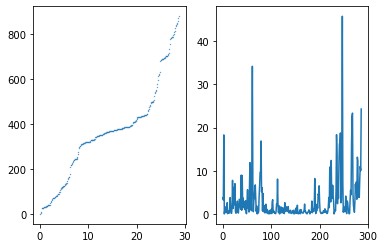

10도 AR1.25
ax1 : path length
ax2 : velocity


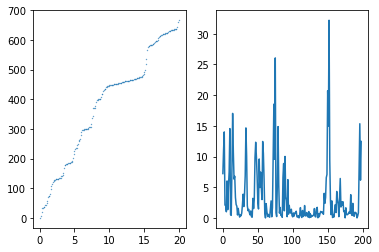

10도 AR1.25
ax1 : path length
ax2 : velocity


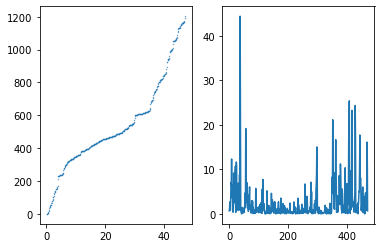

10도 AR1.5
ax1 : path length
ax2 : velocity


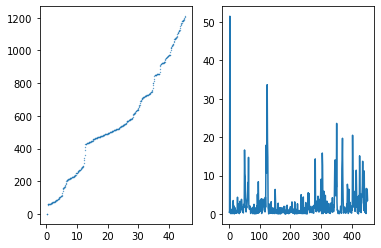

10도 AR1.5
ax1 : path length
ax2 : velocity


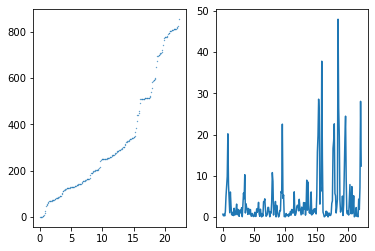

10도 AR1.5
ax1 : path length
ax2 : velocity


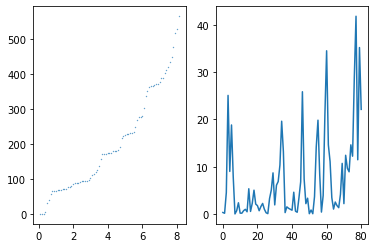

10도 AR1.5
ax1 : path length
ax2 : velocity


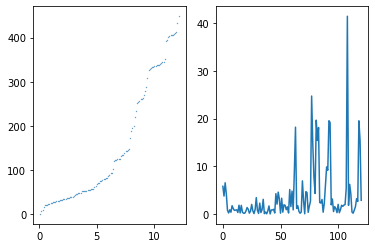

10도 AR1.5
ax1 : path length
ax2 : velocity


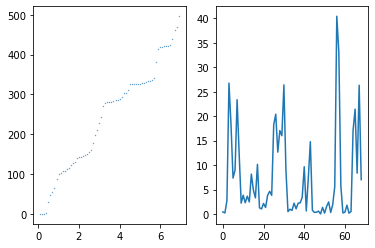

10도 AR1.5
ax1 : path length
ax2 : velocity


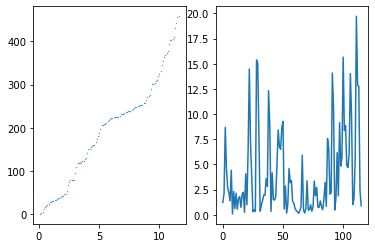

10도 AR1.5
ax1 : path length
ax2 : velocity


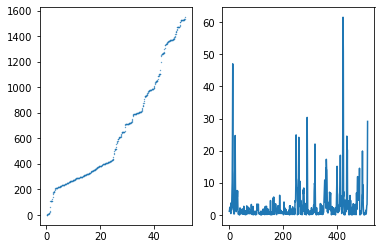

10도 AR1.5
ax1 : path length
ax2 : velocity


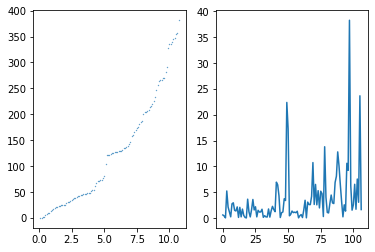

10도 AR2
ax1 : path length
ax2 : velocity


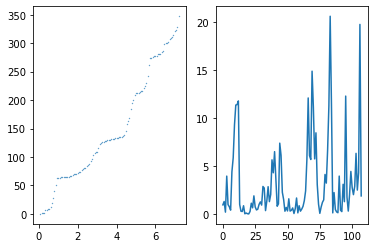

10도 AR2
ax1 : path length
ax2 : velocity


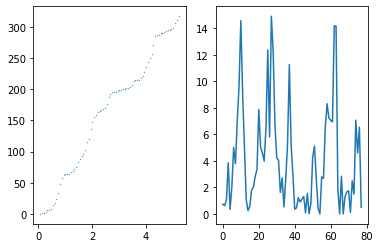

10도 AR2
ax1 : path length
ax2 : velocity


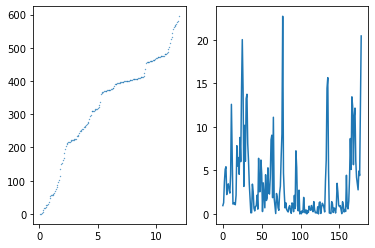

10도 AR2
ax1 : path length
ax2 : velocity


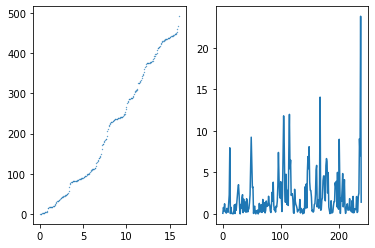

10도 AR2
ax1 : path length
ax2 : velocity


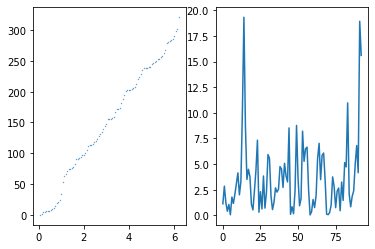

10도 AR2
ax1 : path length
ax2 : velocity


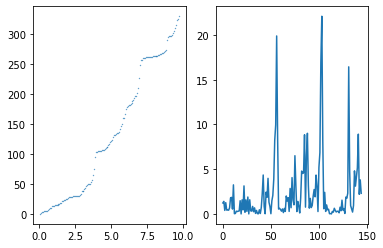

10도 AR2
ax1 : path length
ax2 : velocity


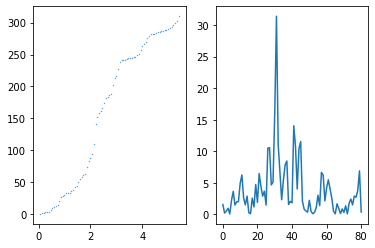

10도 AR2
ax1 : path length
ax2 : velocity


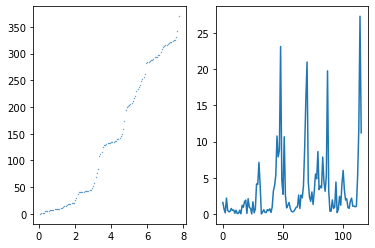

10도 AR2.5
ax1 : path length
ax2 : velocity


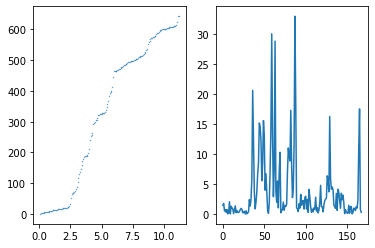

10도 AR2.5
ax1 : path length
ax2 : velocity


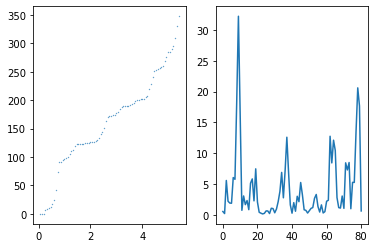

10도 AR2.5
ax1 : path length
ax2 : velocity


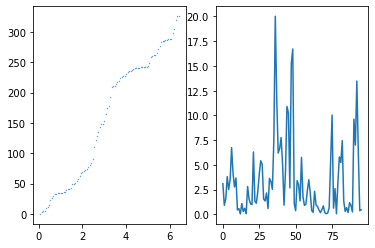

10도 AR2.5
ax1 : path length
ax2 : velocity


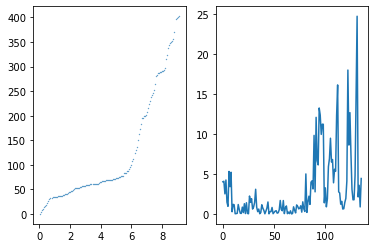

10도 AR2.5
ax1 : path length
ax2 : velocity


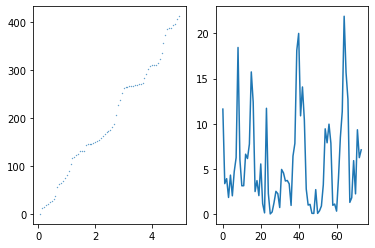

10도 AR2.5
ax1 : path length
ax2 : velocity


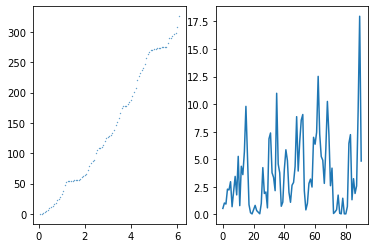

10도 AR2.5
ax1 : path length
ax2 : velocity


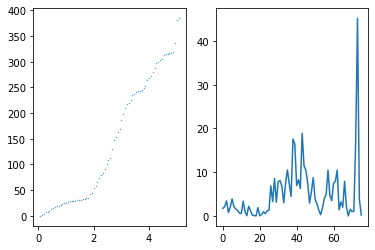

10도 AR2.5
ax1 : path length
ax2 : velocity


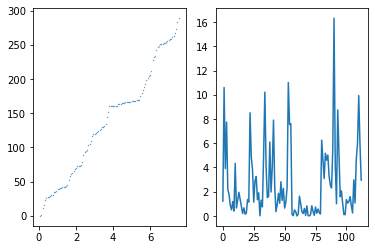

4도 AR1.25
ax1 : path length
ax2 : velocity


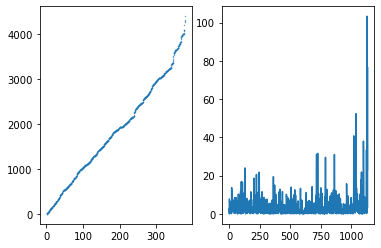

4도 AR1.25
ax1 : path length
ax2 : velocity


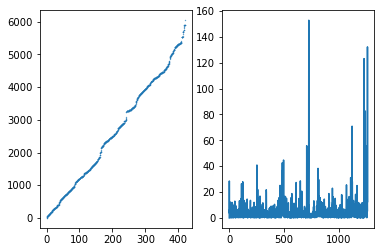

4도 AR1.25
ax1 : path length
ax2 : velocity


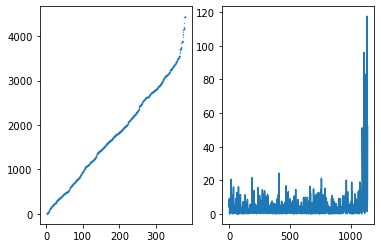

4도 AR1.25
ax1 : path length
ax2 : velocity


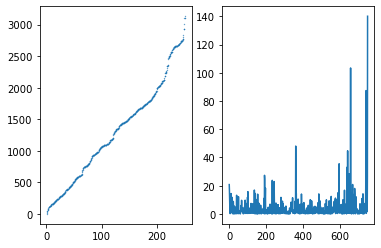

4도 AR1.25
ax1 : path length
ax2 : velocity


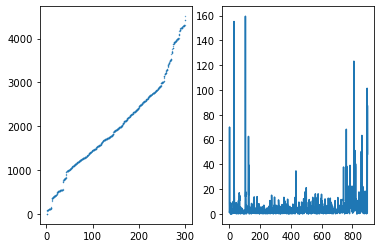

4도 AR1.25
ax1 : path length
ax2 : velocity


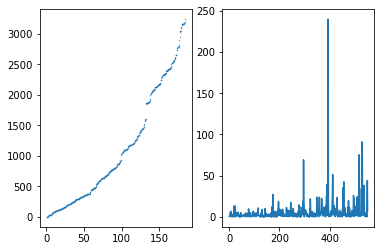

4도 AR1.25
ax1 : path length
ax2 : velocity


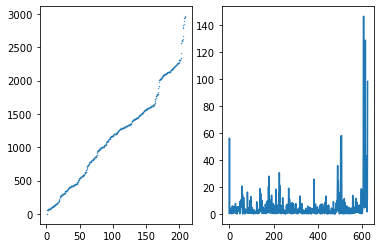

4도 AR1.5
ax1 : path length
ax2 : velocity


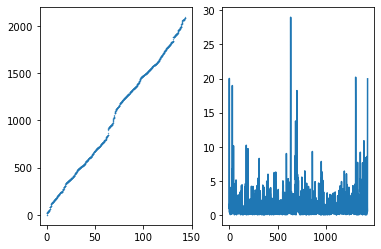

4도 AR1.5
ax1 : path length
ax2 : velocity


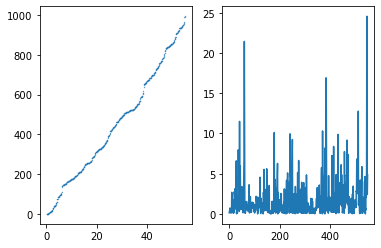

4도 AR1.5
ax1 : path length
ax2 : velocity


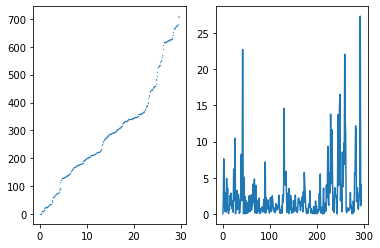

4도 AR1.5
ax1 : path length
ax2 : velocity


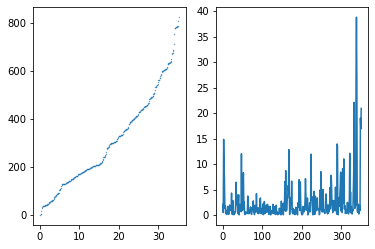

4도 AR1.5
ax1 : path length
ax2 : velocity


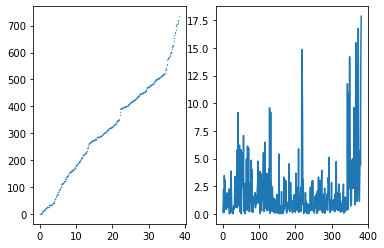

4도 AR1.5
ax1 : path length
ax2 : velocity


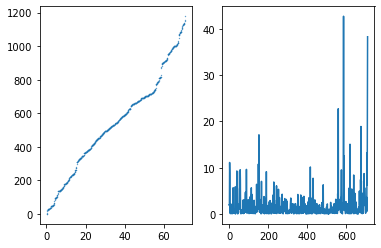

4도 AR1.5
ax1 : path length
ax2 : velocity


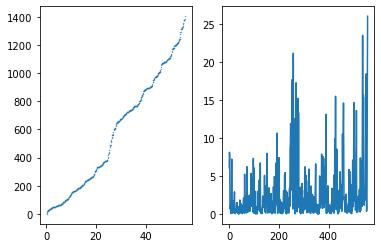

4도 AR1.5
ax1 : path length
ax2 : velocity


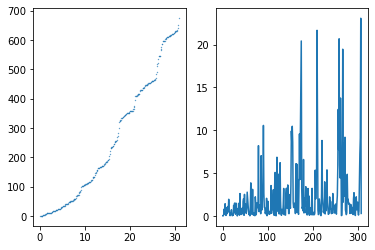

4도 AR2
ax1 : path length
ax2 : velocity


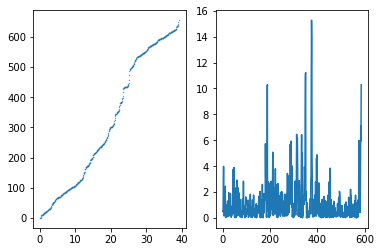

4도 AR2
ax1 : path length
ax2 : velocity


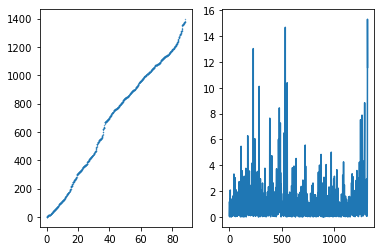

4도 AR2
ax1 : path length
ax2 : velocity


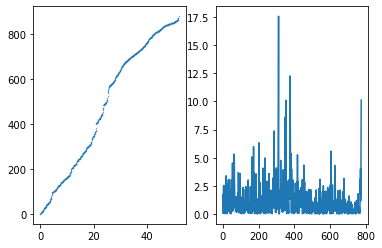

4도 AR2
ax1 : path length
ax2 : velocity


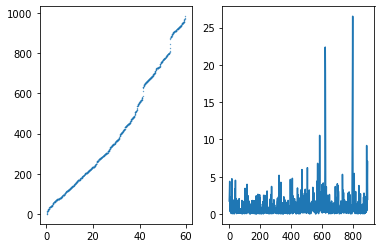

4도 AR2
ax1 : path length
ax2 : velocity


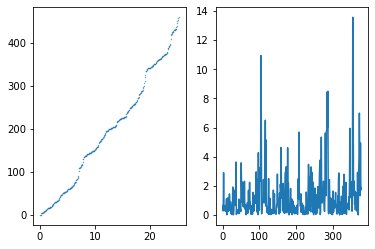

4도 AR2
ax1 : path length
ax2 : velocity


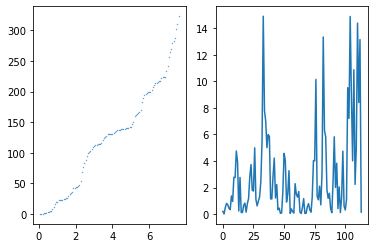

4도 AR2
ax1 : path length
ax2 : velocity


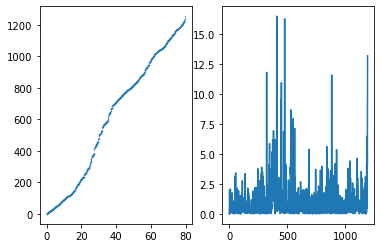

4도 AR2.5
ax1 : path length
ax2 : velocity


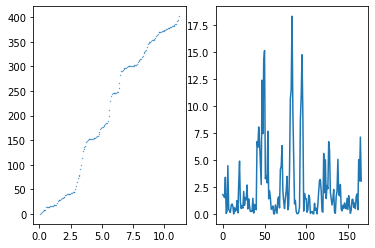

4도 AR2.5
ax1 : path length
ax2 : velocity


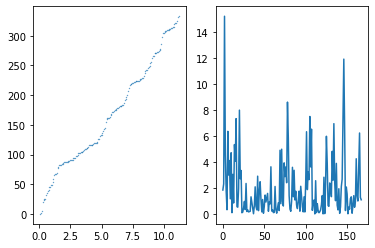

4도 AR2.5
ax1 : path length
ax2 : velocity


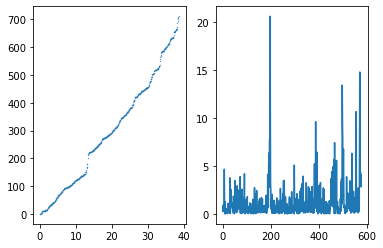

4도 AR2.5
ax1 : path length
ax2 : velocity


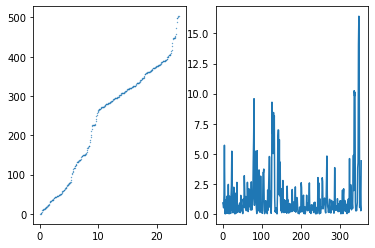

4도 AR2.5
ax1 : path length
ax2 : velocity


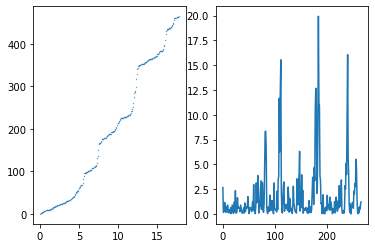

4도 AR2.5
ax1 : path length
ax2 : velocity


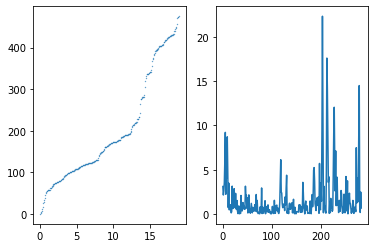

4도 AR2.5
ax1 : path length
ax2 : velocity


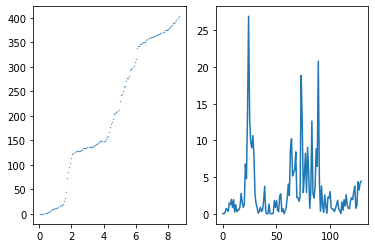

In [30]:
for setting in settings:
    df = pd.read_excel(file,setting)
    t_list = []
    x_list = []
    y_list = []
    for i in df.columns:
        if i[0]=='t':
            t_list.append(i)
        elif i[0]=='x':
            x_list.append(i)
        elif i[0]=='y':
            y_list.append(i)
           
    
    
    
    speed_bins = np.linspace(0,100,100)
    speed_cum = np.zeros(99)
    angle_bins = np.linspace(-np.pi,np.pi,100)
    angle_cum = np.zeros(99)
    t_bins = np.linspace(0,20,10)
    t_cum = np.zeros(9)
    
    for j in range(len(t_list)):
        
        print(setting)
    
        print('ax1 : path length')
        print('ax2 : velocity')
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(121)
        ax2 = fig1.add_subplot(122)
        

        t_traj = df[t_list[j]].to_numpy()
        x_traj = df[x_list[j]].to_numpy()
        y_traj = df[y_list[j]].to_numpy()
        
        dt = t_traj[1:]-t_traj[:-1]
        dx = (x_traj[1:]-x_traj[:-1])
        dy = (y_traj[1:]-y_traj[:-1])
        dl = dx**2+dy**2
        
        detect = dl>10
        
        t_detect = t_traj[1:][detect]
        

        length = np.zeros(len(dl))
        for i in range(len(dl)):
            length[i] = np.sum(dl[:i])
#         ax1.plot(length)
        ax1.scatter(t_traj[1:],length,s=0.1)
#         ax1.scatter(t_traj[1:],dl)
#         plt.hist(t_detect[1:]-t_detect[:-1])
        
        
#         t_count,_,_ = plt.hist(t_detect[1:]-t_detect[:-1], t_bins)
#         t_cum+=t_count
        
#         angle_count,_,_ = plt.hist(vy,speed_bins)
#         angle_cum+=angle_count
    
    
        ax2.plot(dl)
#         ax2.scatter(t_traj[1:],dl)
#     ax2.set_yscale('log')
    
        
    
    
        plt.show()
    # print(t_list,x_list,y_list)

10도 AR1
ax1 : speed hist
ax2 : dangle hist


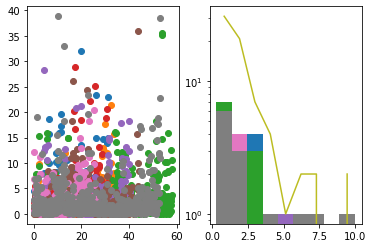

10도 AR1.25
ax1 : speed hist
ax2 : dangle hist


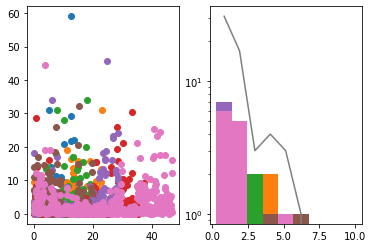

10도 AR1.5
ax1 : speed hist
ax2 : dangle hist


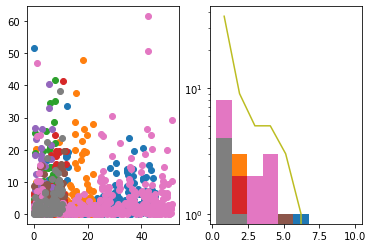

10도 AR2
ax1 : speed hist
ax2 : dangle hist


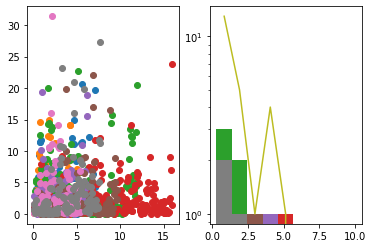

10도 AR2.5
ax1 : speed hist
ax2 : dangle hist


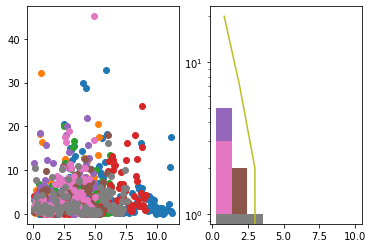

4도 AR1.25
ax1 : speed hist
ax2 : dangle hist


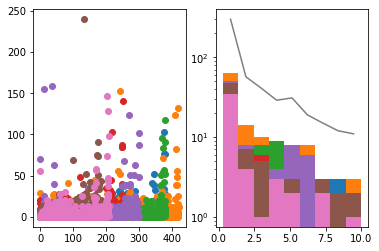

4도 AR1.5
ax1 : speed hist
ax2 : dangle hist


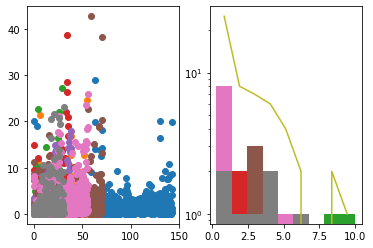

4도 AR2
ax1 : speed hist
ax2 : dangle hist


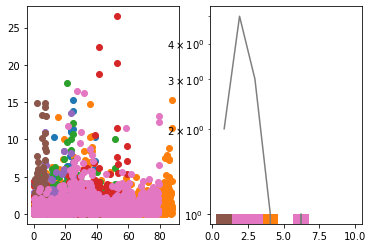

4도 AR2.5
ax1 : speed hist
ax2 : dangle hist


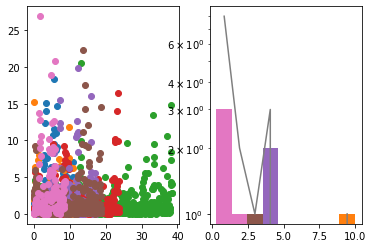

In [33]:
for setting in settings:
    df = pd.read_excel(file,setting)
    t_list = []
    x_list = []
    y_list = []
    for i in df.columns:
        if i[0]=='t':
            t_list.append(i)
        elif i[0]=='x':
            x_list.append(i)
        elif i[0]=='y':
            y_list.append(i)
           
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(121)
    ax2 = fig1.add_subplot(122)
    print(setting)
    
    print('ax1 : speed hist')
    print('ax2 : dangle hist')
    
    speed_bins = np.linspace(0,100,100)
    speed_cum = np.zeros(99)
    angle_bins = np.linspace(-np.pi,np.pi,100)
    angle_cum = np.zeros(99)
    t_bins = np.linspace(0.3,10,10)
    t_cum = np.zeros(9)
    
    for j in range(len(t_list)):
        

        t_traj = df[t_list[j]].to_numpy()
        x_traj = df[x_list[j]].to_numpy()
        y_traj = df[y_list[j]].to_numpy()
        
        dt = t_traj[1:]-t_traj[:-1]
        dx = (x_traj[1:]-x_traj[:-1])
        dy = (y_traj[1:]-y_traj[:-1])
        dl = dx**2+dy**2
        
        detect = dl>10
        
        t_detect = t_traj[1:][detect]
        

#         length = np.zeros(len(dl))
#         for i in range(len(dl)):
#             length[i] = np.sum(dl[:i])
#         ax1.plot(length)
        ax1.scatter(t_traj[1:],dl)
#         plt.hist(t_detect[1:]-t_detect[:-1])
        
        
        t_count,_,_ = plt.hist(t_detect[1:]-t_detect[:-1], t_bins)
        t_cum+=t_count
        
#         angle_count,_,_ = plt.hist(vy,speed_bins)
#         angle_cum+=angle_count
    
    
    ax2.plot((t_bins[:-1]+t_bins[1:])/2,t_cum)
    ax2.set_yscale('log')
    
        
    
    
    plt.show()
    # print(t_list,x_list,y_list)